# **Final Projects 4 - Factor Analysis and K-Means Clustering to Segment Credit Card Customers**

Name: Sarah Aristawidya

Class: PYTN-KS19

# **Introduction**
<hr>

## Background

With the 'CC GENERAL.csv' dataset, this study conducted an in-depth analysis to gain profound insights into the behavior of credit card customers. Encompassing various variables reflecting credit card usage habits, the application of factor analysis and KMeans clustering techniques aimed to identify concealed patterns and relationships within the data.

The first step in this analysis was an initial exploration of the dataset to understand its characteristics. Cleaning and preprocessing processes were then employed to handle missing or incomplete values. Factor analysis was used to uncover the key factors explaining variations in the data, while KMeans clustering helped group customers into specific segments based on behavioral similarities.

Scree plots in factor analysis provided guidance in determining the significant number of factors, while the Elbow Method and Silhouette Plot in KMeans clustering helped determine the optimal number of clusters. Visualization of the analysis results offered a better understanding of the data structure and provided valuable insights into the behaviors of different customer segments.

The outcomes of this analysis can have significant strategic implications, such as designing loyalty programs or adjusting marketing strategies for each customer segment. With a deeper understanding of customer characteristics, companies can enhance overall services and customer experiences. This analysis, therefore, serves as a foundation for smarter and more responsive decision-making in managing relationships with credit card customers.

## Overview

**Outline Notebook**
1. Perkenalan
2. Import Libraries
3. Data Loading
4. Data Cleaning
5. Explorasi Data
6. Data Preprocessing
7. Pendefinisian Model
8. Pelatihan Model
9. Evaluasi Model
10. Model Inference
11. Pengambilan Kesimpulan


**Project Overview**

Data ini berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan. Data ini memiliki 18 atribut.


**Attribute Information:**
1. CUSTID - Identification of Credit Card holder (Categorical)
2. BALANCE - Balance amount left in their account to make purchases (
3. BALANCEFREQUENCY - How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES - Amount of purchases made from account
5. ONEOFFPURCHASES - Maximum purchase amount done in one-go
6. INSTALLMENTSPURCHASES - Amount of purchase done in installment
7. CASHADVANCE - Cash in advance given by the user
8. PURCHASESFREQUENCY - How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFFPURCHASESFREQUENCY - How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASESINSTALLMENTSFREQUENCY - How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11. CASHADVANCEFREQUENCY - How frequently the cash in advance being paid
12. CASHADVANCETRX - Number of Transactions made with "Cash in Advance"
13. PURCHASESTRX - Number of purchase transactions made
14. CREDITLIMIT - Limit of Credit Card for user
15. PAYMENTS - Amount of Payment done by user
16. MINIMUM_PAYMENTS - Minimum amount of payments made by user
17. PRCFULLPAYMENT - Percent of full payment paid by user
18. TENURE - Tenure of credit card service for user


**Objectives:**

The purpose of this Final Project 4 is created to evaluate the concept of Clustering as follows:
* Able to understand the concept of Clustering using Scikit-Learn
* Able to prepare data for use in Clustering
* Able to implement Clustering on the given data

**Dataset Link** : https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

# **Import Libraries**
<hr>

In [1]:
import numpy as np
import pandas as pd

# Import Lib for Data Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns

# Import Lib for Statistical Analysis and Modeling
from scipy.stats import gaussian_kde,zscore,chi2,f_oneway
from scipy.integrate import simps
from factor_analyzer import FactorAnalyzer,calculate_kmo,calculate_bartlett_sphericity
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from pickle import dump,load

pd.set_option("display.max.columns",None)
%matplotlib inline
mpl.style.use(["ggplot"])

# **Data Loading**
Data loading is the process of acquiring, importing, or retrieving data from various sources 
<hr>
Load Data: Reading a CSV file into a DataFrame using the pandas library.

In [2]:
df = pd.read_csv("CC GENERAL.csv")
df.columns = df.columns.str.lower()

# Show 5 data head and tail
df

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
# Show how many rows and columns in dataset
print(df.shape)
print(f"Number of Rows\t\t: {df.shape[0]}")
print(f"Number of Columns\t: {df.shape[1]}")

(8950, 18)
Number of Rows		: 8950
Number of Columns	: 18


In [4]:
# View dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8950 non-null   object 
 1   balance                           8950 non-null   float64
 2   balance_frequency                 8950 non-null   float64
 3   purchases                         8950 non-null   float64
 4   oneoff_purchases                  8950 non-null   float64
 5   installments_purchases            8950 non-null   float64
 6   cash_advance                      8950 non-null   float64
 7   purchases_frequency               8950 non-null   float64
 8   oneoff_purchases_frequency        8950 non-null   float64
 9   purchases_installments_frequency  8950 non-null   float64
 10  cash_advance_frequency            8950 non-null   float64
 11  cash_advance_trx                  8950 non-null   int64  
 12  purcha

# **Data Cleaning**
Data cleaning is the process of identifying and correcting or removing errors, inconsistencies, inaccuracies, and incomplete parts from a dataset. 
<hr>

The data above show that there is a column called 'cust_id' that contains customer ID. The 'cust_id' feature can be dropped as it is unique for every row.

In [5]:
df = df.drop("cust_id",axis=1)

In [6]:
# Create a DataFrame to summarize data types, null values, null percentages, unique values, and a random sample for each column
summary_df = pd.DataFrame({
    "type": df.dtypes.values,  # Extract data types of each column
    "null": df.isnull().sum().values,  # Count null values in each column
    "null_percentage": df.isnull().sum().values / len(df) * 100,  # Calculate null percentage for each column
    "unique": [df[i].nunique() for i in df.columns],  # Count unique values in each column
    "sample": [list(pd.Series(df.dropna()[i].unique()).sample())[0] for i in df.columns]  # Extract a random sample for each column
}).set_index(df.isnull().sum().index).sort_values("null", ascending=False)  # Set the index to column names and sort by null values in descending order

In [7]:
# Check the number of missing values in the dataset
df.isnull().sum()

balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

In [8]:
# View dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   balance                           8950 non-null   float64
 1   balance_frequency                 8950 non-null   float64
 2   purchases                         8950 non-null   float64
 3   oneoff_purchases                  8950 non-null   float64
 4   installments_purchases            8950 non-null   float64
 5   cash_advance                      8950 non-null   float64
 6   purchases_frequency               8950 non-null   float64
 7   oneoff_purchases_frequency        8950 non-null   float64
 8   purchases_installments_frequency  8950 non-null   float64
 9   cash_advance_frequency            8950 non-null   float64
 10  cash_advance_trx                  8950 non-null   int64  
 11  purchases_trx                     8950 non-null   int64  
 12  credit

Based on the above results, it can be observed that 'minimum_payments' and 'credit_limit' have null values. Since both of them have only a small number of null values, we can drop all rows that contain null values.

In [9]:
# Drop rows with missing values from the DataFrame
df = df.dropna()

# Reset the index of the DataFrame after dropping rows with missing values and drop the old index column
df = df.reset_index(drop=True)

In [10]:
# Check the number of missing values in the dataset
df.isnull().sum()

balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
dtype: int64

# **Data Exploration**
Data Exploration is the process of analyzing and visualizing a dataset to gain insights and understand its characteristics.
<hr>

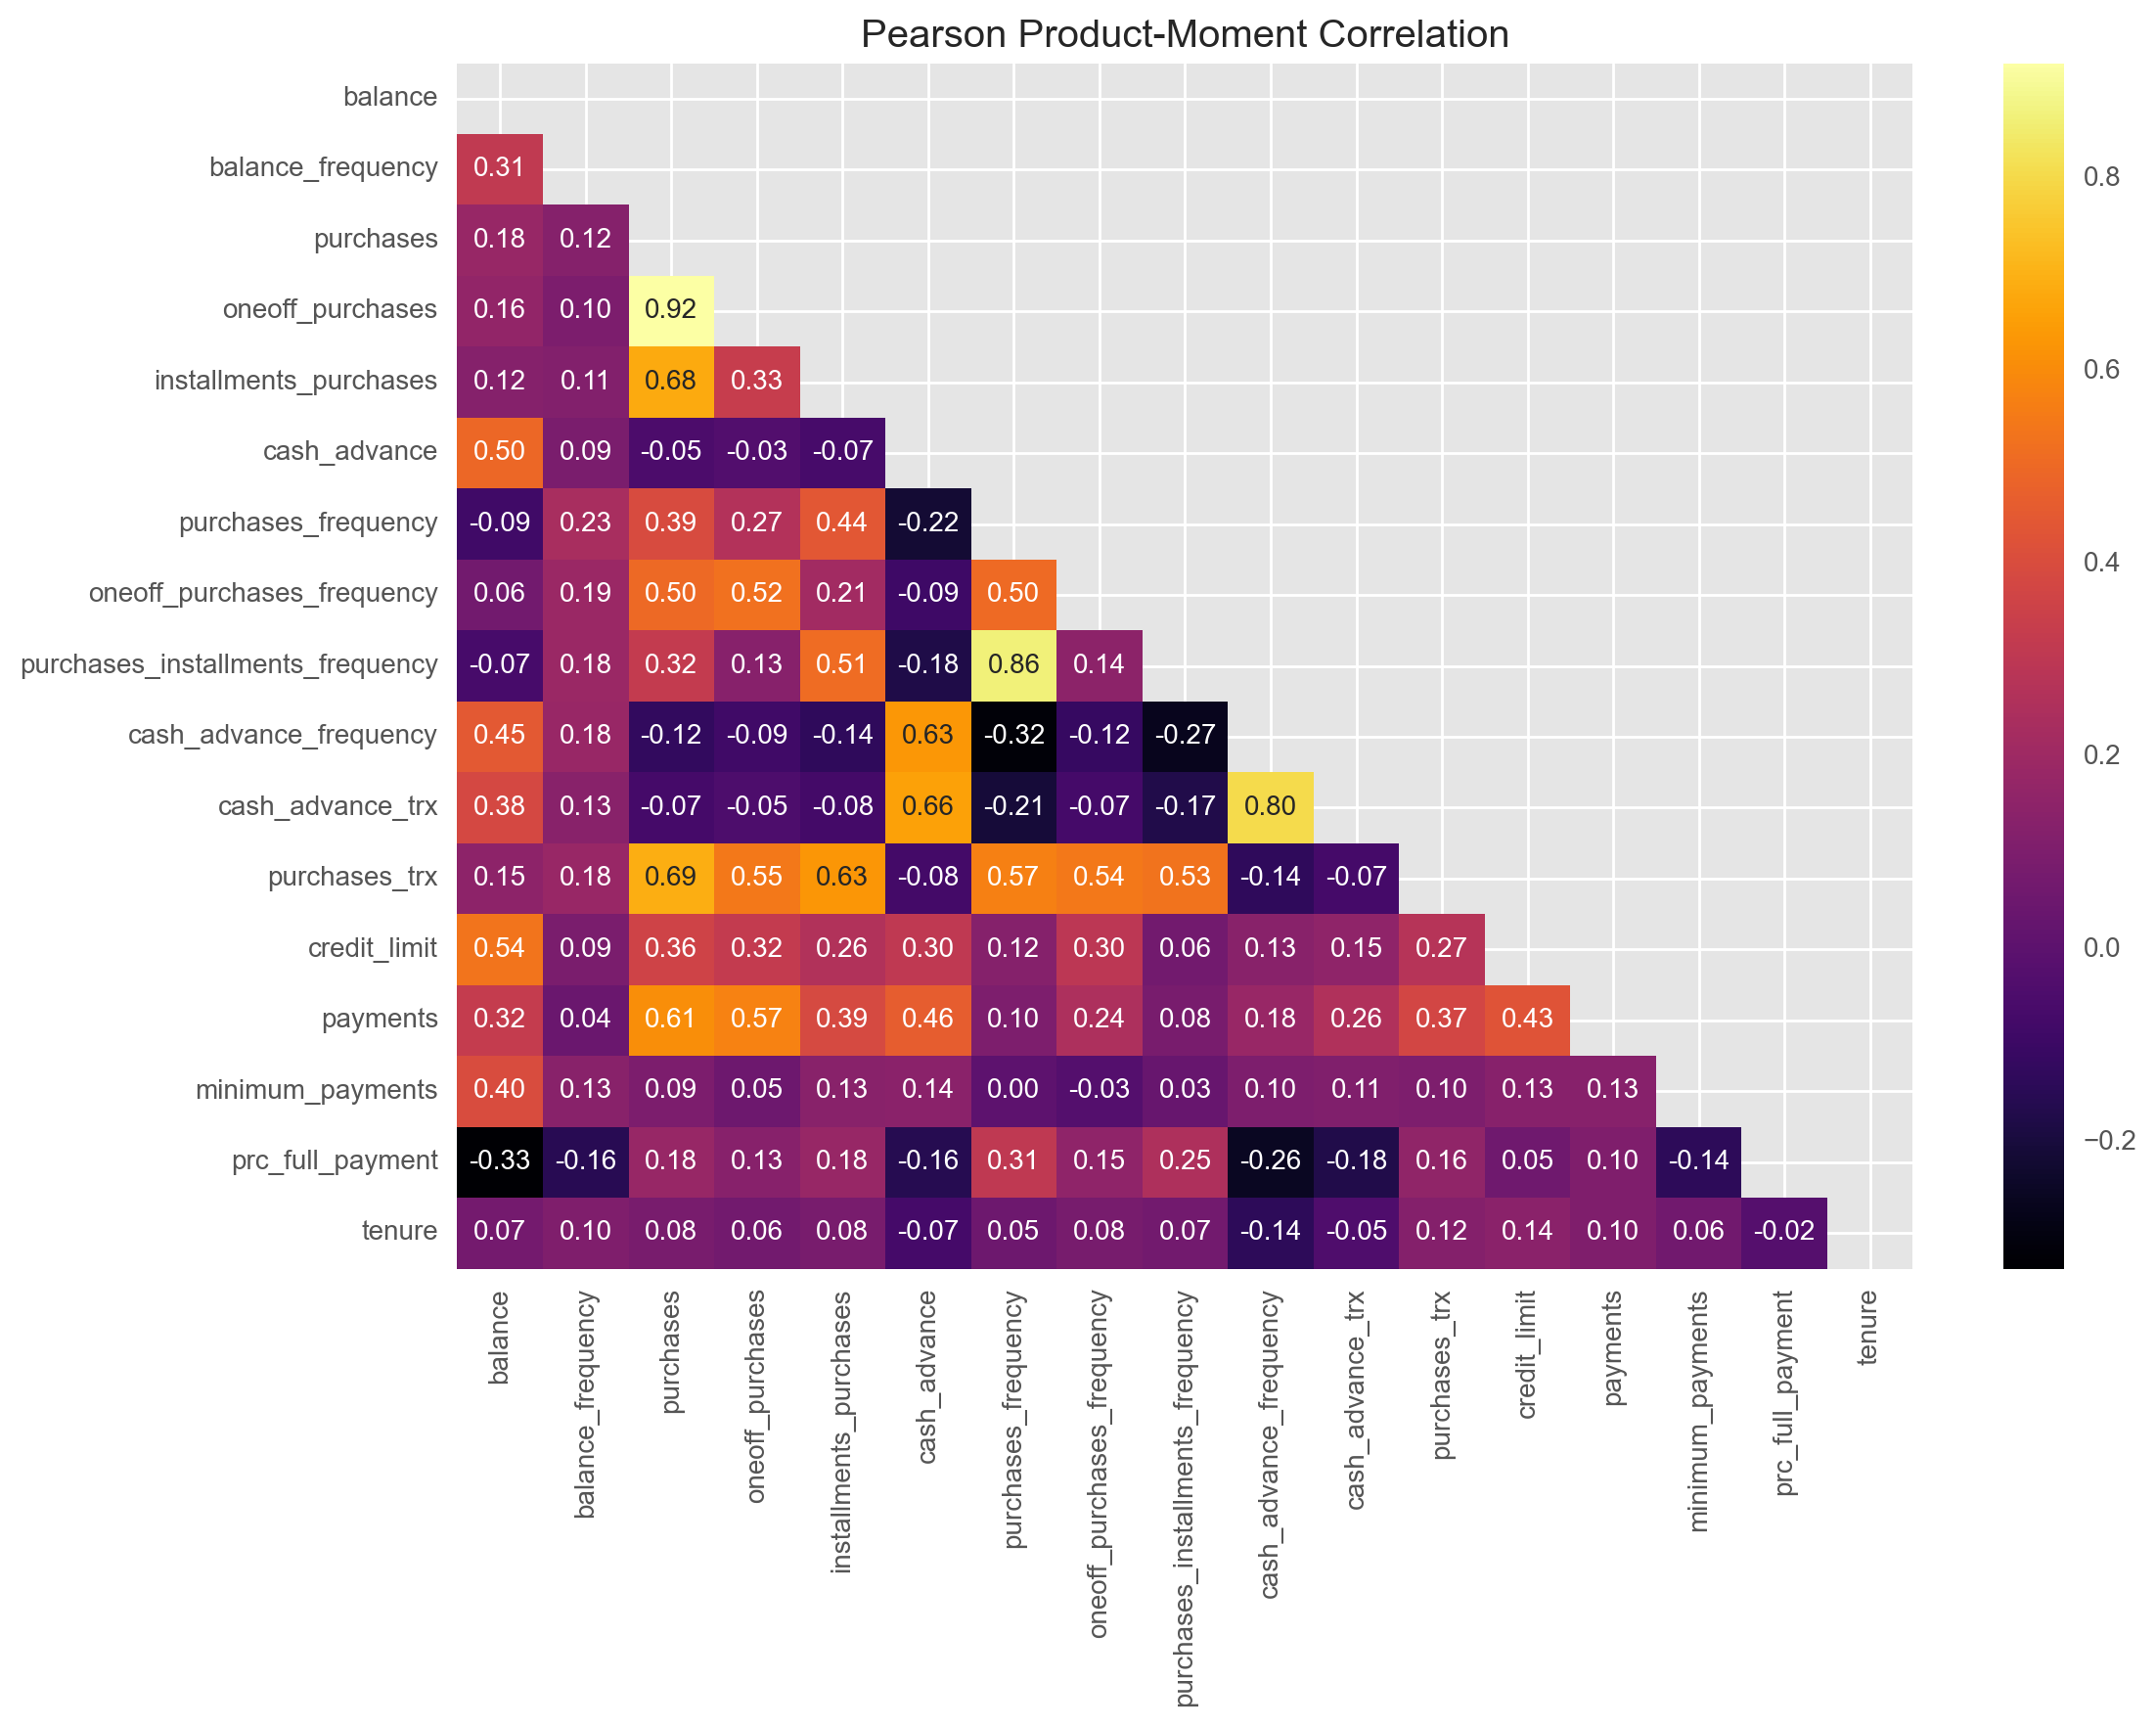

In [11]:
# Create a correlation matrix
corr_matrix = df.corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 8), dpi=200)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(ax=ax, data=corr_matrix, cmap="inferno", annot=True, fmt=".2f", mask=mask)

# Set the title
ax.set_title("Pearson Product-Moment Correlation")

# Show the plot
plt.show()

**Conclusion:**

The plot above indicates that there is a group of customers who are active in making purchases frequently. `The total balance of this group, identified using a threshold of 0.8, constitutes approximately 32.49% of the overall balance` held by all customers. In other words, a small number of customers who engage in frequent transactions have a significant impact on the total balance of all customers.

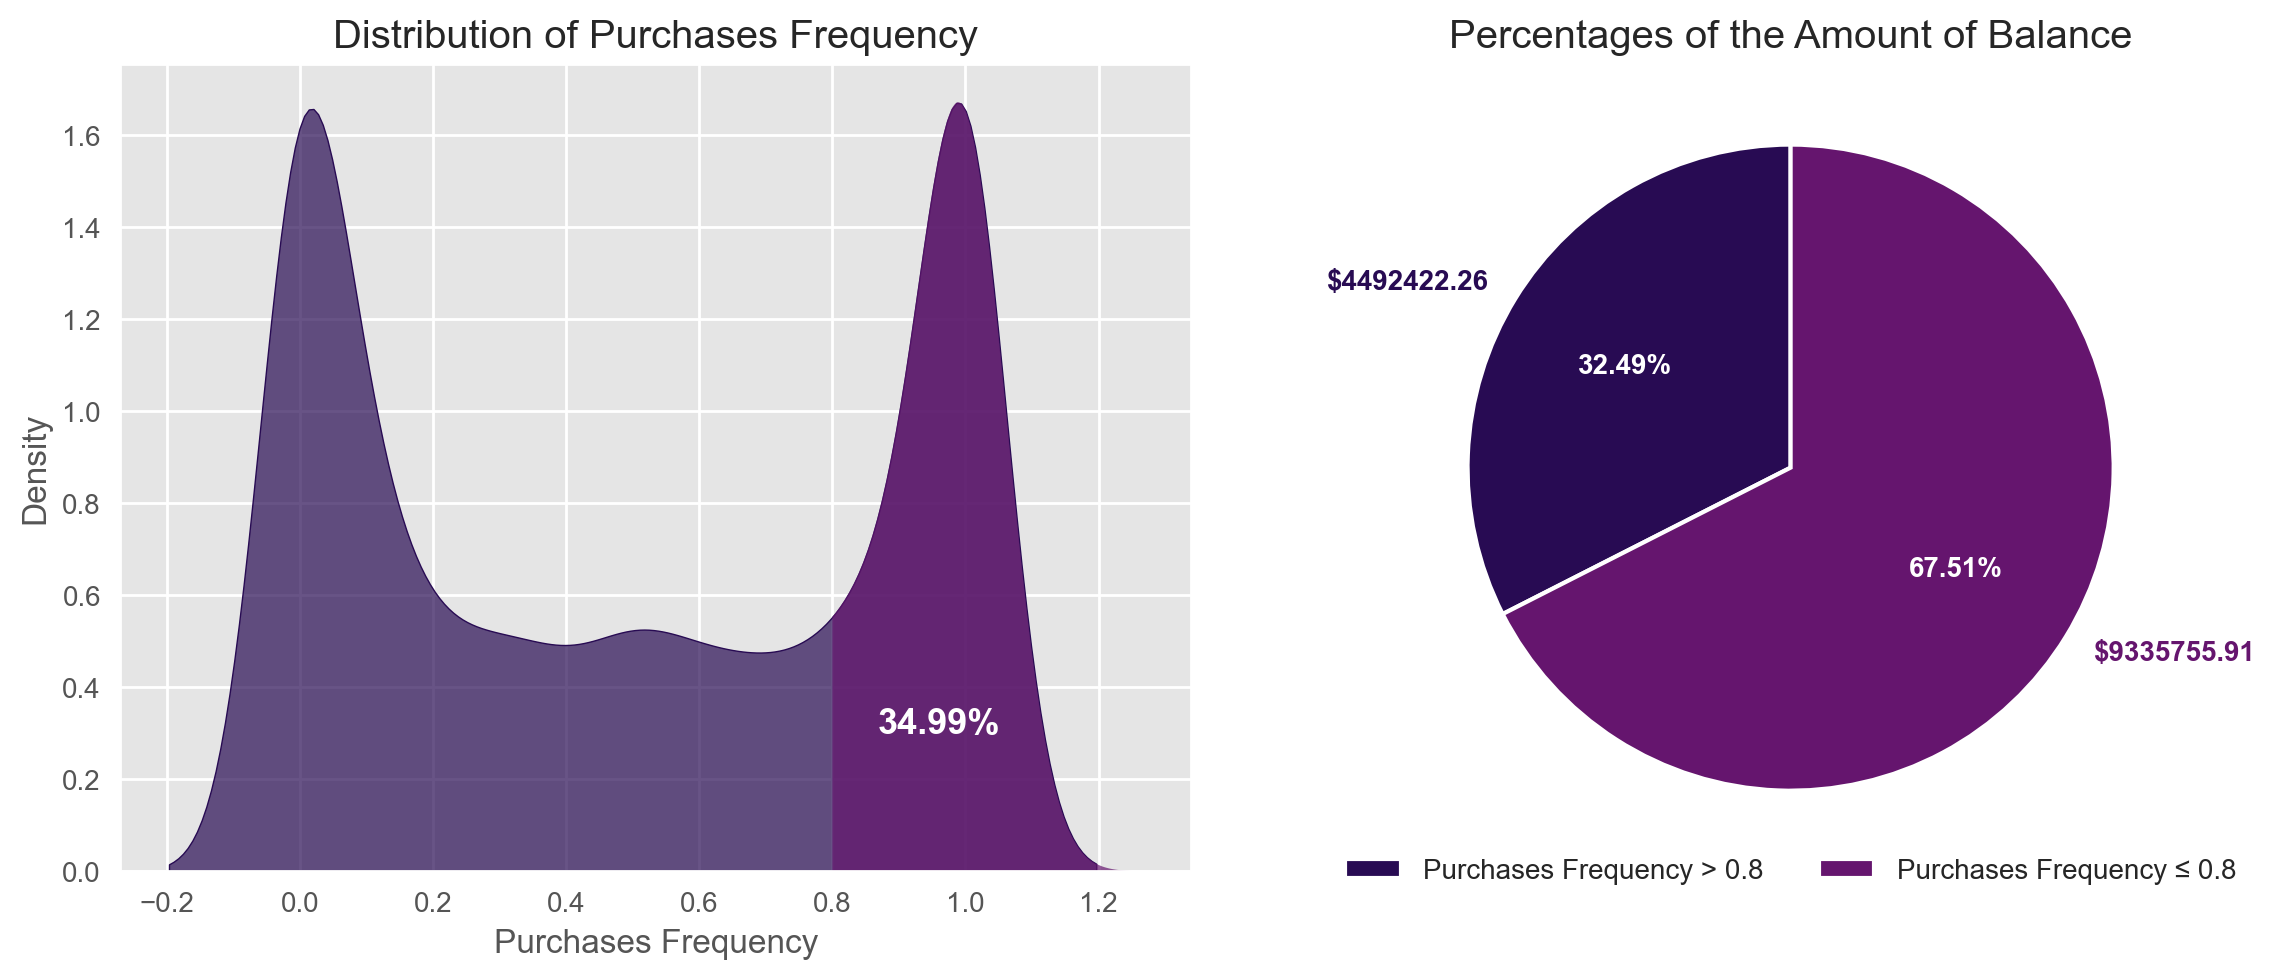

In [12]:
# Set the color palette to "inferno"
sns.set_palette("inferno")

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5), dpi=200)

# Plot the KDE plot
kde_plot = sns.kdeplot(ax=ax[0], data=df, x="purchases_frequency", fill=True, alpha=0.7)
xmin, xmax = kde_plot.get_xlim()
kde = gaussian_kde(df["purchases_frequency"])

# Generate KDE curve
x = np.linspace(xmin, xmax, 10_000)
kde_y = kde(x)
x0, y0 = [], []

# Extract points for the shaded area where purchases_frequency > 0.8
for i, j in zip(x, kde_y):
    if i > 0.8:
        x0.append(i)
        y0.append(j)

# Calculate the area of the shaded region
x0, y0 = np.array(x0), np.array(y0)
area0 = round(simps(y0, x0, dx=1) * 100, 0)

# Fill the shaded area
kde_plot.fill_between(x=x0, y1=y0, alpha=0.7)

# Annotate the percentage of purchases_frequency > 0.8
ax[0].text(
    x=0.96,
    y=0.3,
    horizontalalignment="center",
    s=f"{round(len(df[df['purchases_frequency'] > 0.8]) / len(df) * 100, 2)}%",
    color="white",
    fontweight="bold",
    fontsize=13
)
ax[0].set_title("Distribution of Purchases Frequency")
ax[0].set_xlabel("Purchases Frequency")

# Plot the pie chart
patches, texts, pcts = ax[1].pie(
    [df[df["purchases_frequency"] > 0.8]["balance"].sum(), df[df["purchases_frequency"] <= 0.8]["balance"].sum()],
    labels=[f'${round(df[df["purchases_frequency"] > 0.8]["balance"].sum(), 2)}',
            f'${round(df[df["purchases_frequency"] <= 0.8]["balance"].sum(), 2)}'],
    startangle=90,
    autopct="%.2f%%",
    wedgeprops={"linewidth": 1.5, "edgecolor": "white"}
)
ax[1].set_title("Percentages of the Amount of Balance")
ax[1].legend(patches, ["Purchases Frequency > 0.8", "Purchases Frequency ≤ 0.8"], ncol=2, bbox_to_anchor=(0.5, 0), loc="center")

# Set text properties in the pie chart
for index, patch in enumerate(patches):
    texts[index].set_color(patch.get_facecolor())

# Set percentage and text properties
plt.setp(pcts, color="white", fontweight="bold")
plt.setp(texts, fontweight="bold")

plt.tight_layout()
plt.show()

**Conclusion:**

- The KDE plot illustrates the distribution of the variable 'purchases_frequency' from the DataFrame. The shaded area in the KDE plot represents the portion where 'purchases_frequency' exceeds 0.8, and the percentage of data points in this region is annotated. 
- The pie chart displays the percentages of the total balance corresponding to two categories: 'Purchases Frequency above 0.8' and 'Purchases Frequency less than equal to 0.8.'

The amounts and percentages are labeled, and the legend provides a clear distinction between the two frequency categories. Overall, the visualization aims to convey insights into the distribution of purchase frequencies and the corresponding impact on the total balance.

Based on the plot above, regardless of how frequently customers make purchases, `the proportion of customers who fully pay their bills is relatively small, specifically less than 10% in each purchase` frequency group. This indicates that the majority of customers, including those who make frequent transactions, tend to have payment delays or pay only a portion of their bills.

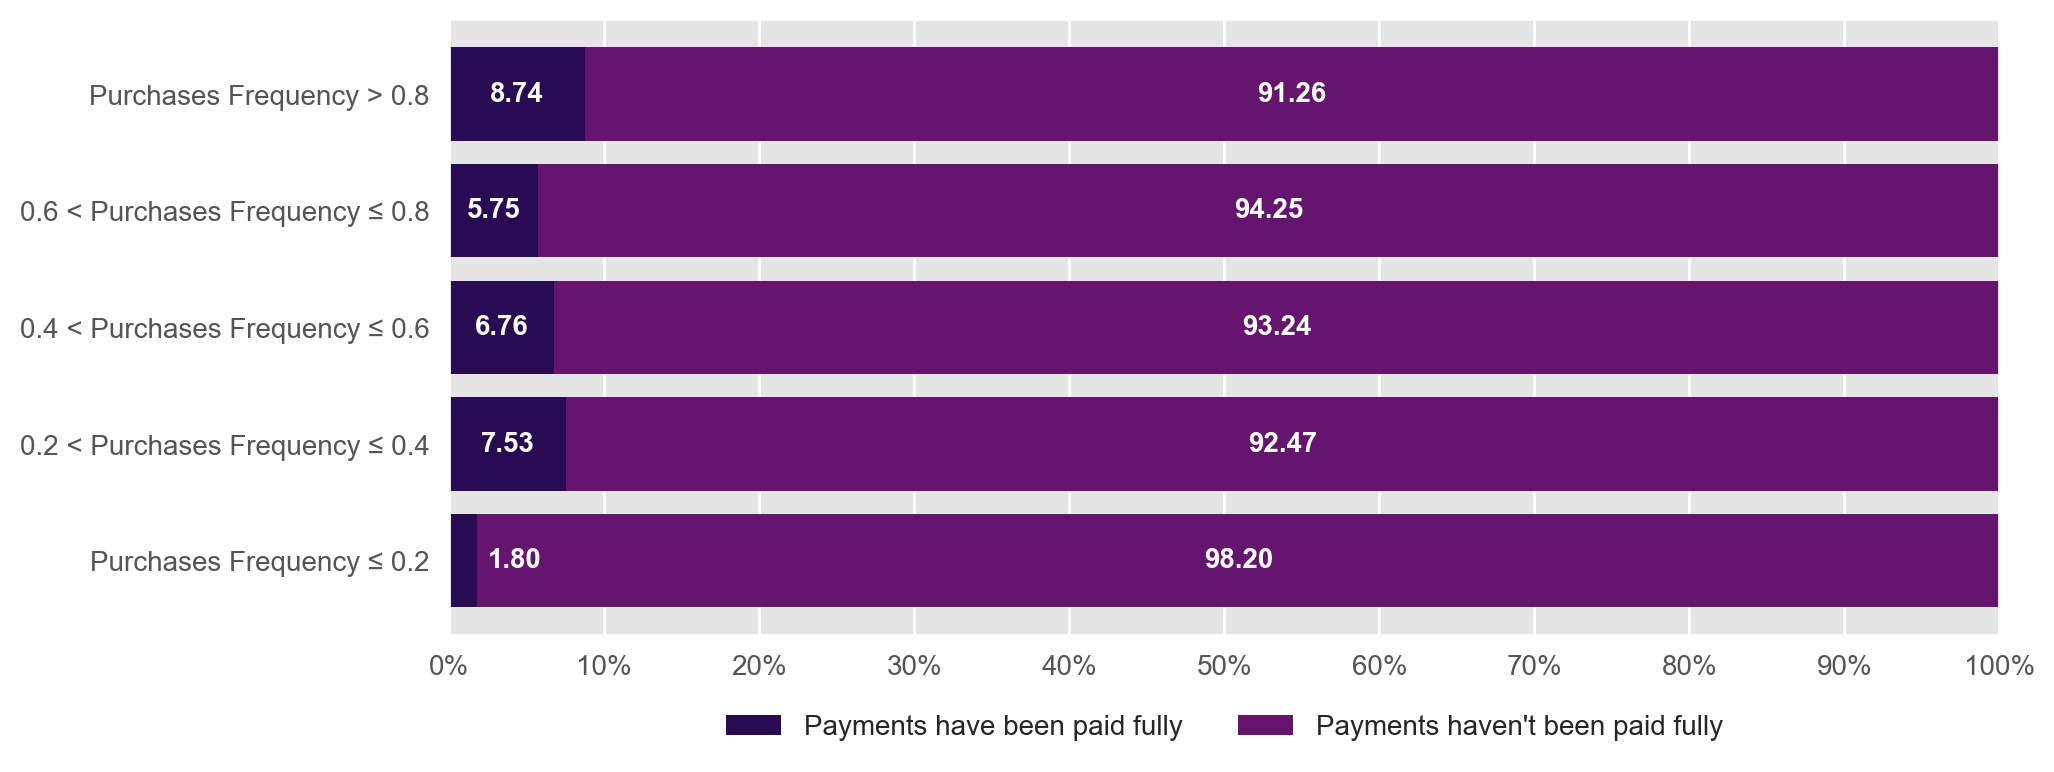

In [13]:
# Set the color palette to "inferno"
sns.set_palette("inferno")

# Split the dataset into five subsets based on purchases_frequency intervals
first = df[df["purchases_frequency"] <= 0.2]
second = df[(df["purchases_frequency"] > 0.2) & (df["purchases_frequency"] <= 0.4)]
third = df[(df["purchases_frequency"] > 0.4) & (df["purchases_frequency"] <= 0.6)]
fourth = df[(df["purchases_frequency"] > 0.6) & (df["purchases_frequency"] <= 0.8)]
fifth = df[df["purchases_frequency"] > 0.8]

# Define labels for each subset
labels = [
    "Purchases Frequency ≤ 0.2", "0.2 < Purchases Frequency ≤ 0.4", "0.4 < Purchases Frequency ≤ 0.6",
    "0.6 < Purchases Frequency ≤ 0.8", "Purchases Frequency > 0.8"
]

# Initialize lists to store percentages for prc_full_payment equal to 1 and not equal to 1
prc_full_payment_is_1, prc_full_payment_not_1 = [], []

# Calculate percentages for each subset
for subset in [first, second, third, fourth, fifth]:
    prc_full_payment_is_1.append(len(subset[subset["prc_full_payment"] == 1]) / len(subset) * 100)
    prc_full_payment_not_1.append(len(subset[subset["prc_full_payment"] != 1]) / len(subset) * 100)

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 4), dpi=200)
n = 0

# Plot bars for each subset with different colors
for label, prc_is_1, prc_not_1 in zip(labels, prc_full_payment_is_1, prc_full_payment_not_1):
    if n == 0:
        ax.barh(label, prc_is_1, color=sns.color_palette()[0], label="Payments have been paid fully")
        ax.barh(label, prc_not_1, left=prc_is_1, color=sns.color_palette()[1], label="Payments haven't been paid fully")
        n += 1
    else:
        ax.barh(label, prc_is_1, color=sns.color_palette()[0])
        ax.barh(label, prc_not_1, left=prc_is_1, color=sns.color_palette()[1])

# Annotate percentages on the bars
for container in ax.containers[:1]:
    ax.bar_label(container, fmt="%.2f", padding=4, color="white", fontweight="bold")
for container in ax.containers[1:]:
    ax.bar_label(container, fmt="%.2f", label_type="center", color="white", fontweight="bold")

# Set plot properties
ax.set_xlim(xmax=100)
ax.set_xticks(np.arange(0, 101, 10), [f"{xtick}%" for xtick in np.arange(0, 101, 10)])
ax.legend(ncol=2, bbox_to_anchor=(0.5, -0.15), loc="center")

# Show the plot
plt.show()

**Conclusion:**

The above plot displays visually informative horizontal bars that represent the distribution of customers within different subsets based on their purchase frequency intervals. The dataset is divided into five subsets, each corresponding to specific ranges of purchase frequencies, as follows:
- Purchases Frequency ≤ 0.2
- 0.2 < Purchases Frequency ≤ 0.4
- 0.4 < Purchases Frequency ≤ 0.6
- 0.6 < Purchases Frequency ≤ 0.8
- Purchases Frequency > 0.8

The length of the bars represents the percentage of customers within each subset falling into both categories: those who have fully paid their payments and those who haven't. Overall, this plot effectively communicates the proportions of customers with and without full payment across various purchase frequency intervals.

# **Data Preprocessing**
Data preprocessing refers to the initial steps taken to clean, transform, and organize raw data before it can be effectively utilized for analysis or machine learning.
<hr>

**Data standardization** is a process of transforming the data distribution to have specific properties, namely a mean (average) equivalent to 0 and a standard deviation equivalent to 1. This is done by subtracting the mean from each data point and then dividing it by the standard deviation. The procedure helps to align the scales of variables that may have different units or ranges of values.

Standardization is particularly useful in various statistical analyses, especially when employing methods highly sensitive to variable scales, such as factor analysis or k-means clustering. For instance, if one variable is measured in units significantly larger than another variable, these methods might assign a higher weight to the former, even if it is not inherently more significant. Standardization addresses this issue by assigning equivalent weights to each variable, ensuring that the results of the analysis are more objective and not influenced by the variable scales.

In [14]:
# Create a copy of the dataframe and apply z-score normalization using the scipy.stats.zscore function
df_z = df.copy().apply(zscore, ddof=1)

# Display the first 10 rows of the normalized dataframe
df_z.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,-0.744582,-0.370025,-0.429159,-0.359139,-0.354805,-0.468628,-0.820721,-0.686240,-0.717137,-0.681913,-0.479409,-0.517593,-0.962520,-0.543910,-0.305490,-0.537696,0.35516
1,0.764108,0.067675,-0.473181,-0.359139,-0.458812,2.568408,-1.236067,-0.686240,-0.926468,0.556990,0.099252,-0.597020,0.677165,0.796806,0.087684,0.212368,0.35516
2,0.426578,0.505375,-0.116406,0.099904,-0.458812,-0.468628,1.256004,2.646498,-0.926468,-0.681913,-0.479409,-0.120460,0.813805,-0.399480,-0.099900,-0.537696,0.35516
3,-0.373889,0.505375,-0.465798,-0.349640,-0.458812,-0.468628,-1.028396,-0.408513,-0.926468,-0.681913,-0.479409,-0.557306,-0.907864,-0.380143,-0.261115,-0.537696,0.35516
4,0.099545,0.505375,0.142054,-0.359139,0.994757,-0.468628,0.425314,-0.686240,0.538851,-0.681913,-0.479409,-0.279313,-0.743895,-0.132112,0.650326,-0.537696,0.35516


# Mahalanobis

The process above is used in statistical analysis to ensure that variables are on a consistent scale, facilitating meaningful comparisons and analyses across different features. **The Mahalanobis** distance provides a measure of how far a data point is from the center of the data distribution in multivariate space. This understanding is valuable when assessing the extent to which a particular observation or data point is "normal" in the context of the overall distribution.

Calculate the Mahalanobis distance for each observation or data point in the dataset. The general formula is:
$$
D_M = \sqrt{ (X - \mu)^T \Sigma^{-1} (X - \mu) }
$$
Where:
- $D_M$ is the Mahalanobis distance
- $X$ is the observation vector
- $\mu$ is the mean vector of the dataset
- $\Sigma^{-1}$ is the inverse of the covariance matrix

In the context of testing multivariate normality, we can calculate the Mahalanobis distance for each data point in our dataset. This distance is then compared to a critical value or predefined threshold. If the Mahalanobis distance of a point is smaller than the critical value, we may consider that the point originates from the same distribution as the majority of the data and, therefore, can be deemed "normal." Conversely, if the distance is greater, it could indicate that the point may originate from a different distribution and may be considered a potential outlier or anomaly in the dataset.

In [15]:
# Import the chi2 function from scipy.stats
from scipy.stats import chi2

# Set the color palette to "inferno"
sns.set_palette("inferno")

# Calculate the mean vector
miu = df_z.mean().values.reshape(-1, 1)

# Calculate the covariance matrix
s = df_z.cov()

# Calculate the inverse of the covariance matrix
s_invers = np.linalg.inv(s)

# Calculate Mahalanobis distances for each data point
mahalanobis = [np.linalg.multi_dot([(df_z.iloc[i].values.reshape(-1, 1) - miu).T, s_invers, (df_z.iloc[i].values.reshape(-1, 1) - miu)])[0, 0] for i in range(len(df_z))]

# Create a DataFrame to store Mahalanobis distances
multivar_normal = pd.DataFrame({"Mahalanobis": mahalanobis})

# Calculate the critical value for the Chi-Square distribution
multivar_normal["Chi-Square"] = [chi2.ppf(0.5, df=len(df_z.columns)) for i in range(len(multivar_normal))]

# Classify points as inside or outside the Mahalanobis distance contour
multivar_normal["Conclusion"] = ["Inside the Contour" if i < j else "Outside the Contour" for i, j in zip(multivar_normal["Mahalanobis"], multivar_normal["Chi-Square"])]

# Define a function to highlight rows based on the conclusion
def highlight_rows(row):
    value = row.loc["Conclusion"]
    if value == "Inside the Contour":
        color = "#af2d5c"  # HEX color code for the first color in inferno
    elif value == "Outside the Contour":
        color = "#3f0068"  # HEX color code for the second color in inferno
    return ["background-color: {}".format(color) for r in row]

# Apply the highlight_rows function to style the first 10 rows of the DataFrame
multivar_normal.head(10).style.apply(highlight_rows, axis=1)

,Mahalanobis,Chi-Square,Conclusion
0,2.877932,16.338182,Inside the Contour
1,13.433229,16.338182,Inside the Contour
2,21.013228,16.338182,Outside the Contour
3,4.167092,16.338182,Inside the Contour
4,5.475169,16.338182,Inside the Contour
5,39.414161,16.338182,Outside the Contour
6,6.375148,16.338182,Inside the Contour
7,4.306394,16.338182,Inside the Contour
8,13.149008,16.338182,Inside the Contour
9,6.446431,16.338182,Inside the Contour


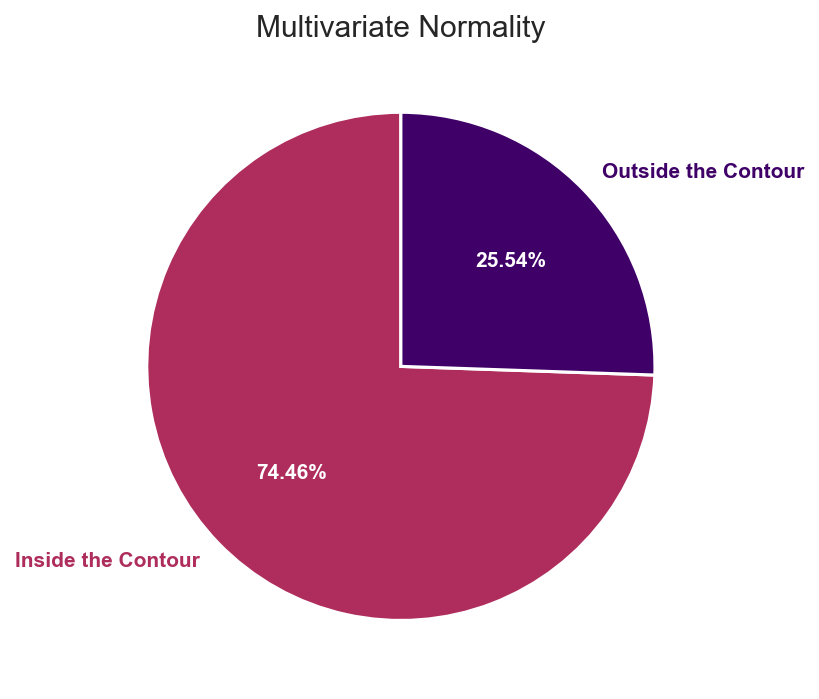

In [16]:
# Create subplots with a DPI of 150
fig, ax = plt.subplots(dpi=150)

# Create a pie chart for the counts of "Inside the Contour" and "Outside the Contour"
patches, texts, pcts = ax.pie(
    multivar_normal.Conclusion.value_counts().values,
    labels=multivar_normal.Conclusion.value_counts().index,
    startangle=90,
    colors=["#af2d5c", "#3f0068"],
    autopct="%.2f%%",
    wedgeprops={"linewidth": 1.5, "edgecolor": "white"}
)

# Set the text color for each wedge to match its face color
for index, patch in enumerate(patches):
    texts[index].set_color(patch.get_facecolor())

# Set the percentage labels to white and bold
plt.setp(pcts, color="white", fontweight="bold")

# Set the text labels to bold
plt.setp(texts, fontweight="bold")

# Set the title of the plot
ax.set_title("Multivariate Normality")

# Display the plot
plt.show()

**Conclusion:**

Based on the table and pie chart above, it can be concluded that `more than half (50%) of the total data in the dataset is inside the contour of the normal distribution` in a plot or visualization. This contour is likely created based on boundaries that encompass the majority of the data within a normal distribution. By observing that more than half of the data is within this contour, `we can infer or assume that the dataset's distribution generally follows the pattern or characteristics of a normal distribution`.

In [17]:
# Create FactorAnalyzer instance with the "minres" method
fa = FactorAnalyzer(method='minres', n_factors=3)

# Fit the model
fa.fit(df)

# Get factor loadings
loadings = fa.loadings_

# Print factor loadings
print(loadings)

[[ 0.17694977  0.67499285 -0.00785562]
 [-0.04273494  0.27606036  0.29548088]
 [ 1.05666235 -0.08825313 -0.10558364]
 [ 1.03177699 -0.10232434 -0.30104872]
 [ 0.40038977  0.01198745  0.36181898]
 [-0.00793529  0.7798731  -0.09800083]
 [-0.02365584 -0.12310219  0.92012853]
 [ 0.50914187 -0.07714332  0.1021253 ]
 [-0.20582673 -0.04434245  1.01170298]
 [-0.15701279  0.8043578  -0.09772933]
 [-0.1215347   0.77515057 -0.02618281]
 [ 0.52456955 -0.00143639  0.39148755]
 [ 0.42613118  0.32804119 -0.02327394]
 [ 0.69053094  0.32321225 -0.17116815]
 [ 0.04374905  0.26370352  0.07232798]
 [ 0.14343835 -0.28367671  0.1395593 ]
 [ 0.11076091 -0.01985512  0.03783687]]


# KMO and Bartlett's Test

The **Kaiser-Meyer-Olkin (KMO) measure and Bartlett's test** are commonly used in factor analysis to assess the suitability of a dataset for factor analysis.

- **KMO Measure** is a statistic that evaluates the suitability of a dataset for factor analysis by measuring the degree of shared variance among the variables in the dataset. A KMO value approaching 1 indicates that the variability explained by latent factors is very high, making the dataset more suitable for factor analysis.

- **Bartlett's Test** is a statistical test that assesses the null hypothesis that all variables in a dataset are uncorrelated. If the KMO value is greater than 0.6 and the p-value for Bartlett's test is significant (p < 0.05), it indicates that the variables are not independently uncorrelated, supporting the dataset's suitability for factor analysis.

Therefore, with a high KMO value and a significant p-value for Bartlett's test, it can be considered that the dataset has characteristics conducive to conducting factor analysis effectively.

In [18]:
print(f"KMO\t\t: {calculate_kmo(df_z)[-1]}")
print(f"Bartlett\t: {calculate_bartlett_sphericity(df_z)[-1]}")

KMO		: 0.6408932395421296
Bartlett	: 0.0


C:\Users\SARAH\anaconda3\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


**Conclusion:**

Based on the results above, it can be observed that the `KMO value is greater than 0.6`, and the `p-value for Bartlett's test is significant (p < 0.05)`. Therefore, it can be concluded that the variables are not independently uncorrelated, supporting the dataset's suitability for factor analysis.

# Scree Plot
The plot above is a **scree plot** used to understand how much variation in the data can be explained by each factor. Eigenvalues represent the amount of variability explained by each factor. In this context, since there are 5 factors with eigenvalues greater than 1, we choose to extract these 5 factors because they are considered significant. Overall, these factors are expected to explain approximately 70.37% of the variation in the data, indicating a substantial contribution to explaining the factor structure within the dataset.

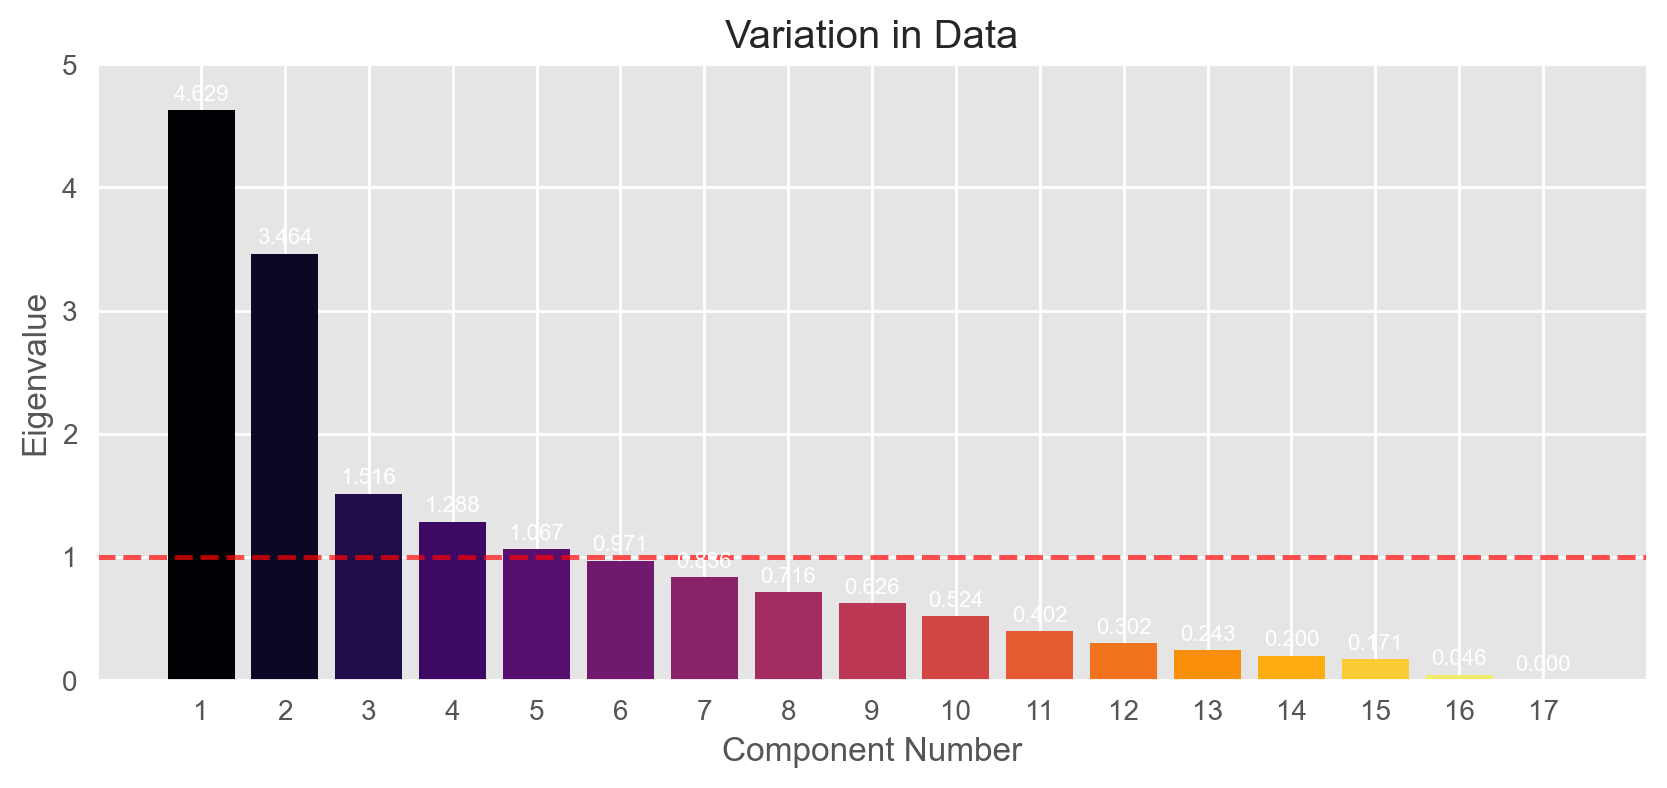

In [19]:
n = len(df_z.columns)
fa = FactorAnalyzer(rotation="varimax", method="principal")
fa.fit(df_z)

fig, ax = plt.subplots(figsize=(10, 4), dpi=200)

# Inferno type-A colors
colors = plt.get_cmap('inferno')(np.linspace(0, 1, n))

bars = ax.bar(
    range(1, n + 1),
    fa.get_eigenvalues()[0],
    color=colors
)

for bars in ax.containers:
    ax.bar_label(bars, fmt="%.3f", fontsize=8, padding=2, fontweight=500, color="white")

ax.axhline(y=1, color="red", linestyle="--", alpha=0.7)
ax.set_title("Variation in Data")
ax.set_xticks(range(1, n + 1))
ax.set_xlabel("Component Number")
ax.set_ylabel("Eigenvalue")
ax.set_ylim(ymax=5)
plt.show()

In [20]:
# Calculate the total variance explained for each component
total_variance_explained = pd.DataFrame({
    "Component": range(1, n + 1),
    "Eigenvalue": fa.get_eigenvalues()[0],
    "% of Variance": fa.get_eigenvalues()[0] / len(df_z.columns) * 100
}).set_index("Component")

# Calculate the cumulative variance explained
total_variance_explained["Cumulative"] = total_variance_explained["% of Variance"].cumsum()

# Define a function to highlight rows based on the Eigenvalue
def highlight_rows(row):
    value = row.loc["Eigenvalue"]
    if value > 1:
        color = "#fbc100"  # HEX color code for the first color
    else:
        color = "#f87f00"  # HEX color code for the second color
    return ["background-color: {}".format(color) for r in row]

# Apply the highlighting function to the DataFrame
total_variance_explained.style.apply(highlight_rows, axis=1)

,Eigenvalue,% of Variance,Cumulative
Component,,,
1,4.629300,27.231177,27.231177
2,3.463632,20.374308,47.605485
3,1.516117,8.918334,56.523818
4,1.287513,7.573609,64.097427
5,1.067025,6.276618,70.374045
6,0.971174,5.712786,76.086831
7,0.835752,4.916188,81.003019
8,0.715825,4.210734,85.213753
9,0.625888,3.681697,88.895450


In [21]:
fa_5 = FactorAnalyzer(n_factors=5,rotation="varimax",method="principal")
fa_5.fit(df_z)

FactorAnalyzer(method='principal', n_factors=5, rotation='varimax',
               rotation_kwargs={})

In the process of factor analysis, the **component matrix** is often rotated to enhance the interpretability of the factors. The varimax rotation method, one of the most commonly used rotation techniques, is applied to achieve a simpler and clearer structure in the rotated component matrix. The purpose of rotation is to make the factors more easily interpretable and facilitate the identification of variables that are most strongly associated with each factor.

Once the varimax rotation is performed, the resulting rotated component matrix provides a refined representation of the relationships between the original variables and the extracted factors. By examining the loadings in the rotated matrix, one can discern which variables are most strongly correlated with each factor. Variables with high loadings on a specific factor are considered to have a strong association with that factor.

This interpretation is valuable for understanding the underlying structure of the data. For instance, if a variable exhibits a high loading on a particular factor, it suggests a substantial influence of that variable on the identified factor. Therefore, the rotated component matrix serves as a key tool for unraveling the latent structure within the dataset, aiding in the identification and interpretation of meaningful patterns and associations among variables.

In [22]:
# Create a DataFrame for the rotated component matrix
rotated_component_matrix = pd.DataFrame(
    data=fa_5.loadings_,
    columns=[f"Component {component + 1}" for component in range(fa_5.n_factors)],
    index=df_z.columns
)

# Display the rotated component matrix
rotated_component_matrix

,Component 1,Component 2,Component 3,Component 4,Component 5
balance,0.227475,0.523886,-0.060145,0.594524,0.255954
balance_frequency,0.049512,0.157904,0.223390,0.148993,0.762657
purchases,0.884665,-0.060941,0.299793,0.105016,-0.047183
oneoff_purchases,0.912430,-0.069261,0.042115,-0.007289,0.037106
installments_purchases,0.414613,-0.016886,0.631283,0.261577,-0.179850
cash_advance,0.065702,0.856693,-0.097051,0.120192,-0.075990
purchases_frequency,0.220248,-0.188748,0.848001,-0.118278,0.227714
oneoff_purchases_frequency,0.672939,-0.128112,0.159978,-0.216886,0.414639
purchases_installments_frequency,0.025414,-0.118729,0.933708,0.027648,0.056552
cash_advance_frequency,-0.056596,0.865555,-0.181987,-0.021120,0.174385


In [23]:
factors = []
for variable in rotated_component_matrix.index:
    for index,value in enumerate(rotated_component_matrix.loc[variable],start=1):
        if abs(value) == np.max(np.array(abs(rotated_component_matrix.loc[variable]))):
            factors.append(index)

factor_1,factor_2,factor_3,factor_4,factor_5 = ([] for _ in range(fa_5.n_factors))
for variable,factor in zip(rotated_component_matrix.index,factors):
    if factor == 1:
        factor_1.append(variable)
    elif factor == 2:
        factor_2.append(variable)
    elif factor == 3:
        factor_3.append(variable)
    elif factor == 4:
        factor_4.append(variable)
    else:
        factor_5.append(variable)

components = pd.DataFrame(
    data=[factor_1,factor_2,factor_3,factor_4,factor_5],
    index=[f"Component {component + 1}" for component in range(fa_5.n_factors)]
).T
components.replace([None]," ",inplace=True)
components

,Component 1,Component 2,Component 3,Component 4,Component 5
0,purchases,cash_advance,installments_purchases,balance,balance_frequency
1,oneoff_purchases,cash_advance_frequency,purchases_frequency,minimum_payments,prc_full_payment
2,oneoff_purchases_frequency,cash_advance_trx,purchases_installments_frequency,tenure,
3,purchases_trx,,,,
4,credit_limit,,,,
5,payments,,,,


In [24]:
# Transform the original DataFrame using the fitted FactorAnalysis model
df_fa = pd.DataFrame(data=fa_5.fit_transform(df_z), columns=[f"Component {i + 1}" for i in range(fa_5.n_factors)])

# Display the first few rows of the transformed DataFrame
df_fa.head()

,Component 1,Component 2,Component 3,Component 4,Component 5
0,-0.468001,-0.806452,-0.800246,0.046945,-0.202331
1,-0.019107,1.169520,-0.788684,0.573086,-0.802249
2,0.809211,-0.786300,-0.606089,-0.284058,1.874243
3,-0.348487,-0.765665,-0.981168,0.129313,0.405370
4,-0.595084,-0.556173,0.640184,1.021097,0.057387


# **Model Definition and Training**
Model training is a crucial step in machine learning where the model learns from the data. 
<hr>

The elbow method and the silhouette method are two approaches that can be used to determine the optimal number of clusters in a k-means clustering analysis.

- **Elbow Method**: The elbow method involves instructing the k-means algorithm to determine clusters from 1 to a predefined maximum number. For each cluster number, the within-cluster sum of squared distances (WCSS) is calculated, and a graph depicting the number of clusters versus WCSS is created. At the point where the reduction in WCSS starts to slow down, forming an elbow-like shape, that is considered the optimal number of clusters.

- **Silhouette Method**: The silhouette method provides a silhouette score for each data point in the clustering analysis. The silhouette score ranges from -1 to 1, with higher scores indicating how well a point fits with its own cluster compared to other clusters. The number of clusters with the highest average silhouette score can be considered the optimal number of clusters.

Both methods serve as criteria for selecting the most suitable number of clusters by examining the patterns and structures within the data. The elbow method focuses on the trade-off between a simple model (fewer clusters) and the goodness of fit (minimizing WCSS), while the silhouette method assesses the compactness and separation of clusters based on individual data point silhouettes.

# Elbow Method

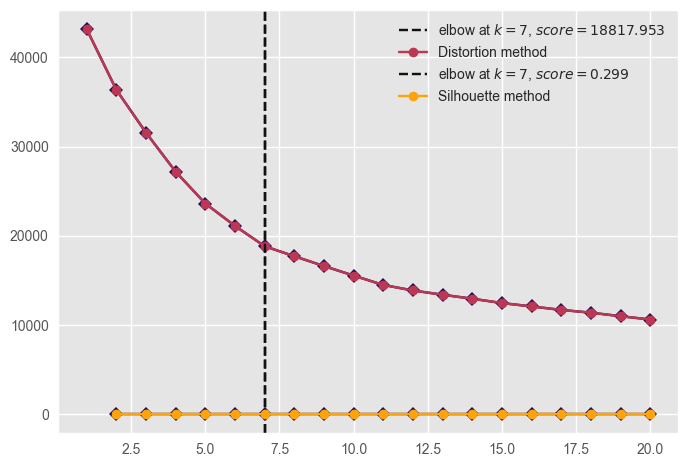

In [25]:
import matplotlib.cm as cm

# Set the random state and range of clusters
random_state = 42
start = 1
end = 20

# Initialize lists to store scores and elbow-related information
scores, elbows_indexes, elbows_scores, methods = [], [], [], ["distortion", "silhouette"]

# Iterate through distortion and silhouette methods
for method in methods:
    # Adjust starting point for silhouette method
    if method == "silhouette":
        start = 2

    # Create a KMeans model with explicit n_init
    kmeans_model = KMeans(init="k-means++", random_state=random_state, n_init=10)

    # Initialize the KElbowVisualizer
    visualizer = KElbowVisualizer(kmeans_model, k=(start, end + 1), metric=method, timings=False)
    
    # Fit the visualizer to the transformed data
    visualizer.fit(df_fa)

    # Append scores and elbow-related information
    scores.append(visualizer.k_scores_)
    elbows_indexes.append(visualizer.elbow_value_)
    elbows_scores.append(visualizer.elbow_score_)

    # Update color of the visualizer line plot
    inferno_cmap = cm.inferno
    line_color = inferno_cmap(0.5) if method == "distortion" else inferno_cmap(0.8)
    visualizer.ax.plot(
        visualizer.k_values_,
        visualizer.k_scores_,
        marker="o",
        color=line_color,
        label=f"{method.capitalize()} method",
    )

# Display the legend
plt.legend()
# Show the plot
plt.show()

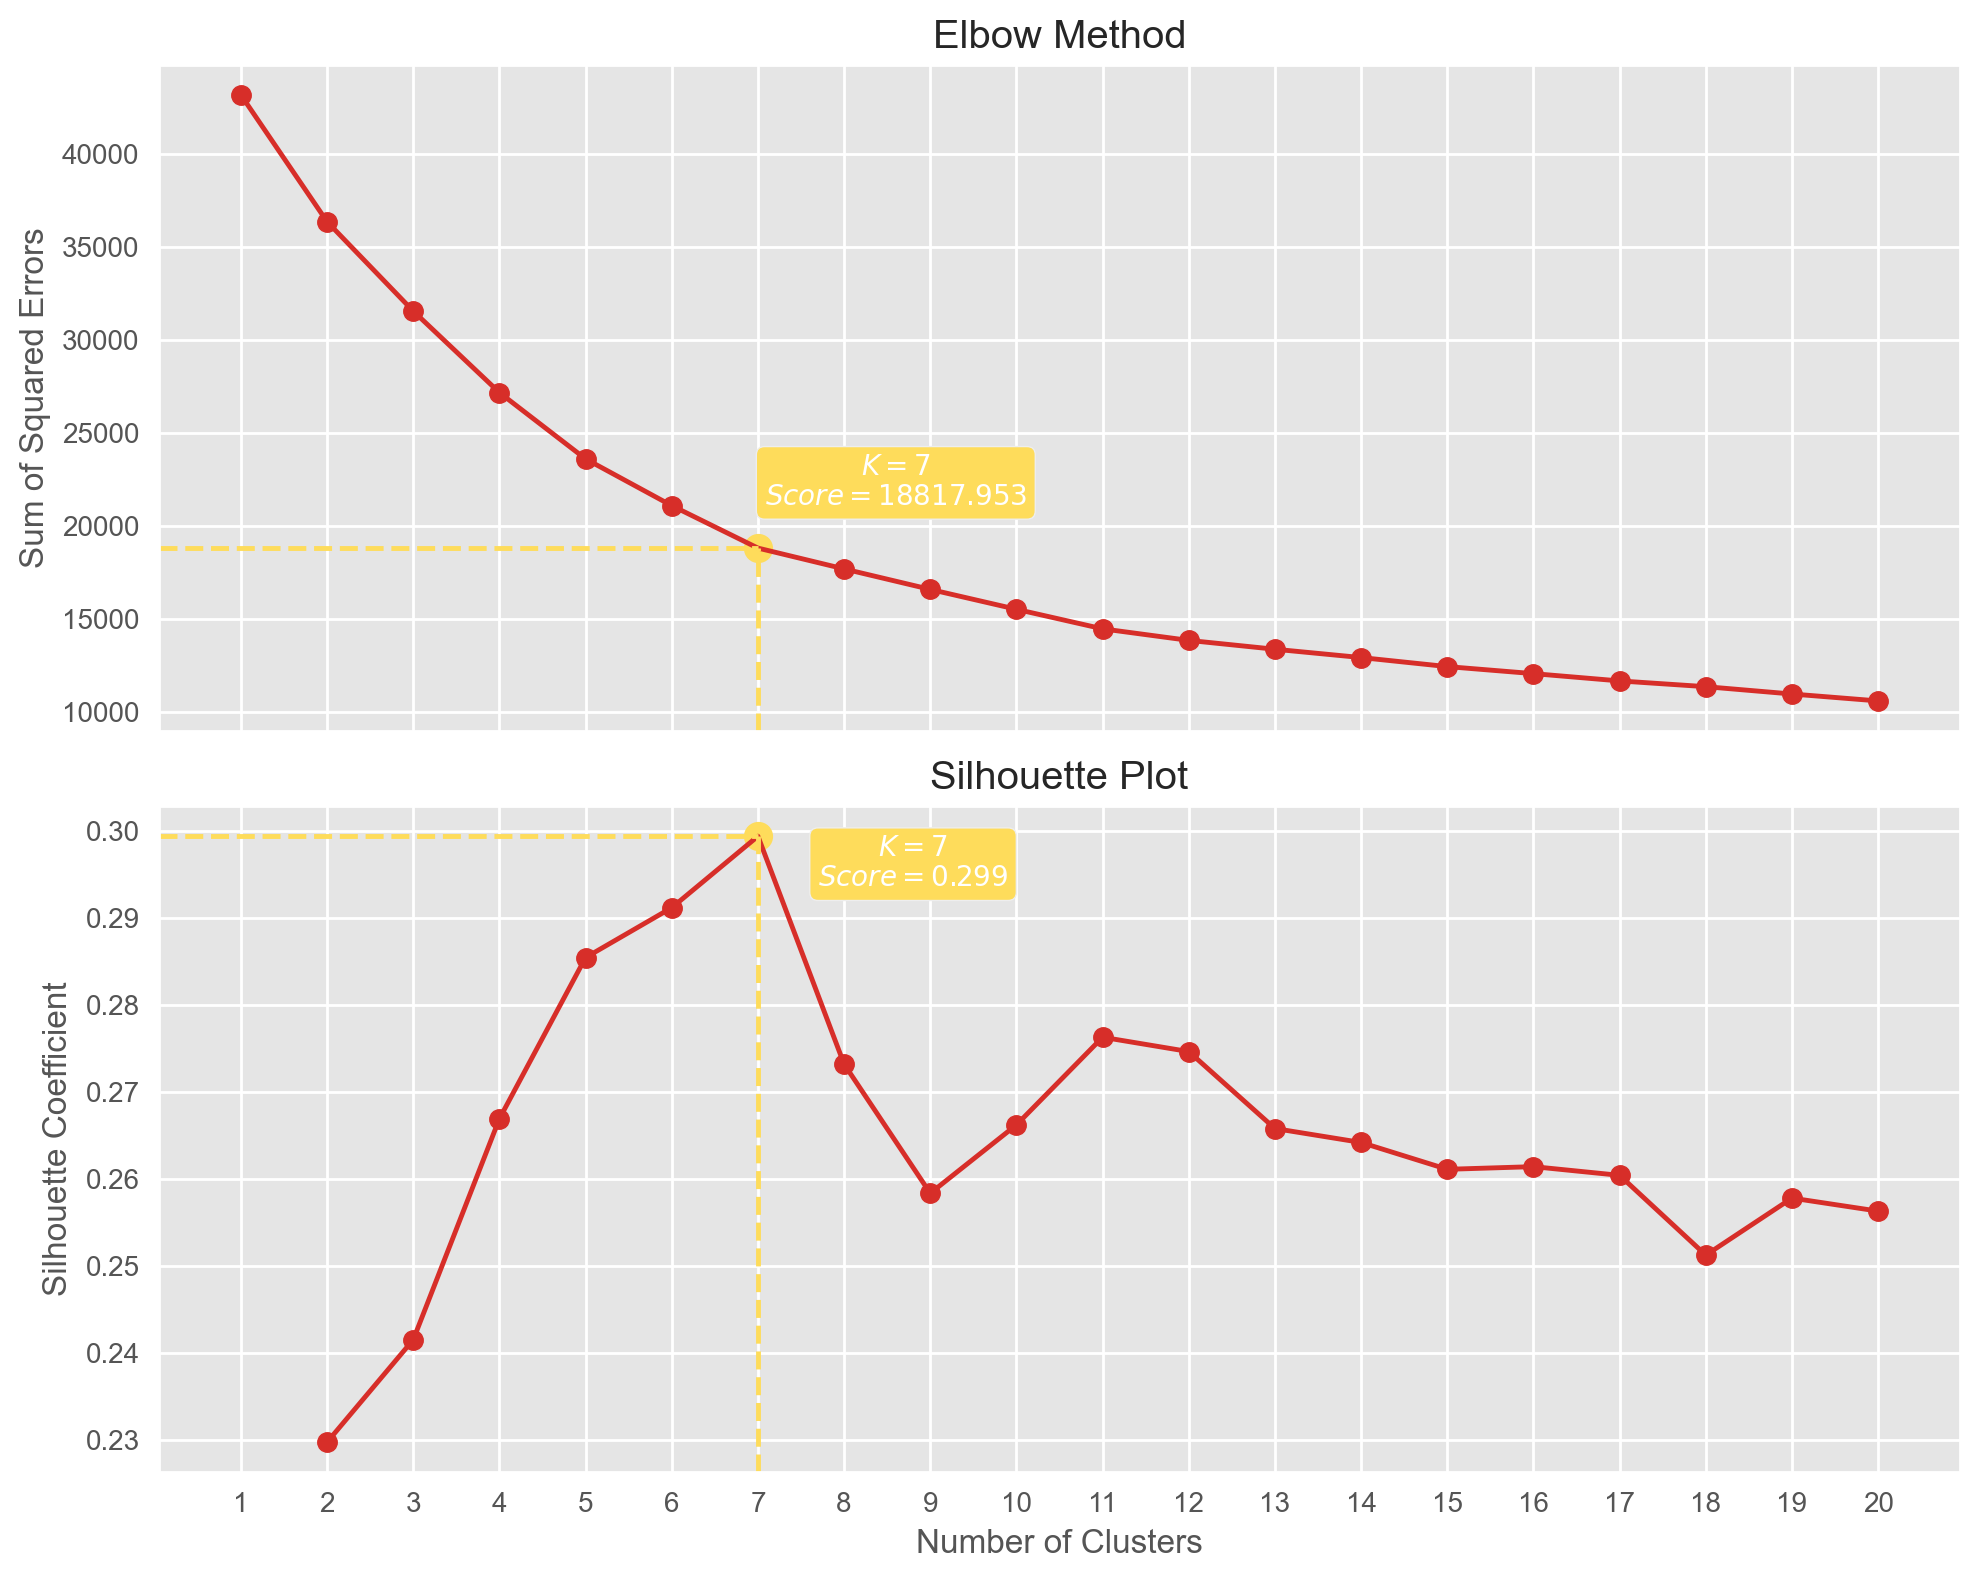

In [26]:
# Set the range of clusters
start = 1
end = 20

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 8), dpi=200, sharex=True)

# Elbow Method
ax[0].plot(range(start, end + 1), scores[0], color="#d72e29")
ax[0].scatter(range(start, end + 1), scores[0], color="#d72e29")
ax[0].scatter(elbows_indexes[0], elbows_scores[0], color="#fedc5b", s=100)
ax[0].set_xticks(range(start, end + 1))

# Set limits
xmin, xmax = ax[0].get_xlim()
ymin, ymax = ax[0].get_ylim()

# Highlight the elbow point
ax[0].plot((xmin, elbows_indexes[0]), (elbows_scores[0], elbows_scores[0]), color="#fedc5b", linestyle="--")
ax[0].plot((elbows_indexes[0], elbows_indexes[0]), (ymin, elbows_scores[0]), color="#fedc5b", linestyle="--")
ax[0].set_xlim(xmin, xmax)
ax[0].set_ylim(ymin, ymax)
ax[0].set_title("Elbow Method")
ax[0].set_ylabel("Sum of Squared Errors")

# Annotate the elbow point
ax[0].text(
    x=elbows_indexes[0] + 1.6,
    y=elbows_scores[0] + 2_000,
    horizontalalignment="center",
    verticalalignment="bottom",
    s=f"$ K = {elbows_indexes[0]} $\n$ Score = {round(elbows_scores[0], 3)} $",
    color="white",
    fontweight="bold",
    bbox=dict(x=0, facecolor="#fedc5b", boxstyle="round"),
)

# Silhouette Plot
ax[1].plot(range(start + 1, end + 1), scores[1], color="#d72e29")
ax[1].scatter(range(start + 1, end + 1), scores[1], color="#d72e29")
ax[1].scatter(elbows_indexes[1], elbows_scores[1], color="#fedc5b", s=100)
ax[1].set_xticks(range(start, end + 1))

# Set limits
xmin, xmax = ax[1].get_xlim()
ymin, ymax = ax[1].get_ylim()

# Highlight the elbow point
ax[1].plot((xmin, elbows_indexes[1]), (elbows_scores[1], elbows_scores[1]), color="#fedc5b", linestyle="--")
ax[1].plot((elbows_indexes[1], elbows_indexes[1]), (ymin, elbows_scores[1]), color="#fedc5b", linestyle="--")
ax[1].set_xlim(xmin, xmax)
ax[1].set_ylim(ymin, ymax)
ax[1].set_title("Silhouette Plot")
ax[1].set_xlabel("Number of Clusters")
ax[1].set_ylabel("Silhouette Coefficient")

# Annotate the elbow point
ax[1].text(
    x=elbows_indexes[1] + 1.8,
    y=elbows_scores[1],
    horizontalalignment="center",
    verticalalignment="top",
    s=f"$ K = {elbows_indexes[1]} $\n$ Score = {round(elbows_scores[1], 3)} $",
    color="white",
    fontweight="bold",
    bbox=dict(x=0, facecolor="#fedc5b", boxstyle="round")
)

# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

# Silhouette Plot

In a more detailed silhouette plot, each object in the dataset is represented by a horizontal line along the x-axis, where the position of the line reflects the silhouette score of that object. The x-axis ranges from -1 to 1, where a score of 1 indicates that the object is very similar to others in the same cluster and significantly dissimilar from objects in other clusters. The plot includes a vertical dashed line indicating the average silhouette score for all objects in the model. If the majority of object lines are above the average line, it indicates well-formed and distinctly separated clusters, signifying the success of the model in forming meaningful clusters.

Through this visualization, silhouette analysis provides a deeper insight into how each object contributes to the cluster quality. By observing the relative positions of silhouette lines to the average line, researchers can assess the extent to which clusters are well-separated and how similar objects within them are to each other. This becomes a crucial tool in evaluating and interpreting the results of k-means analysis, offering a richer understanding of the quality and structure of the formed clusters.

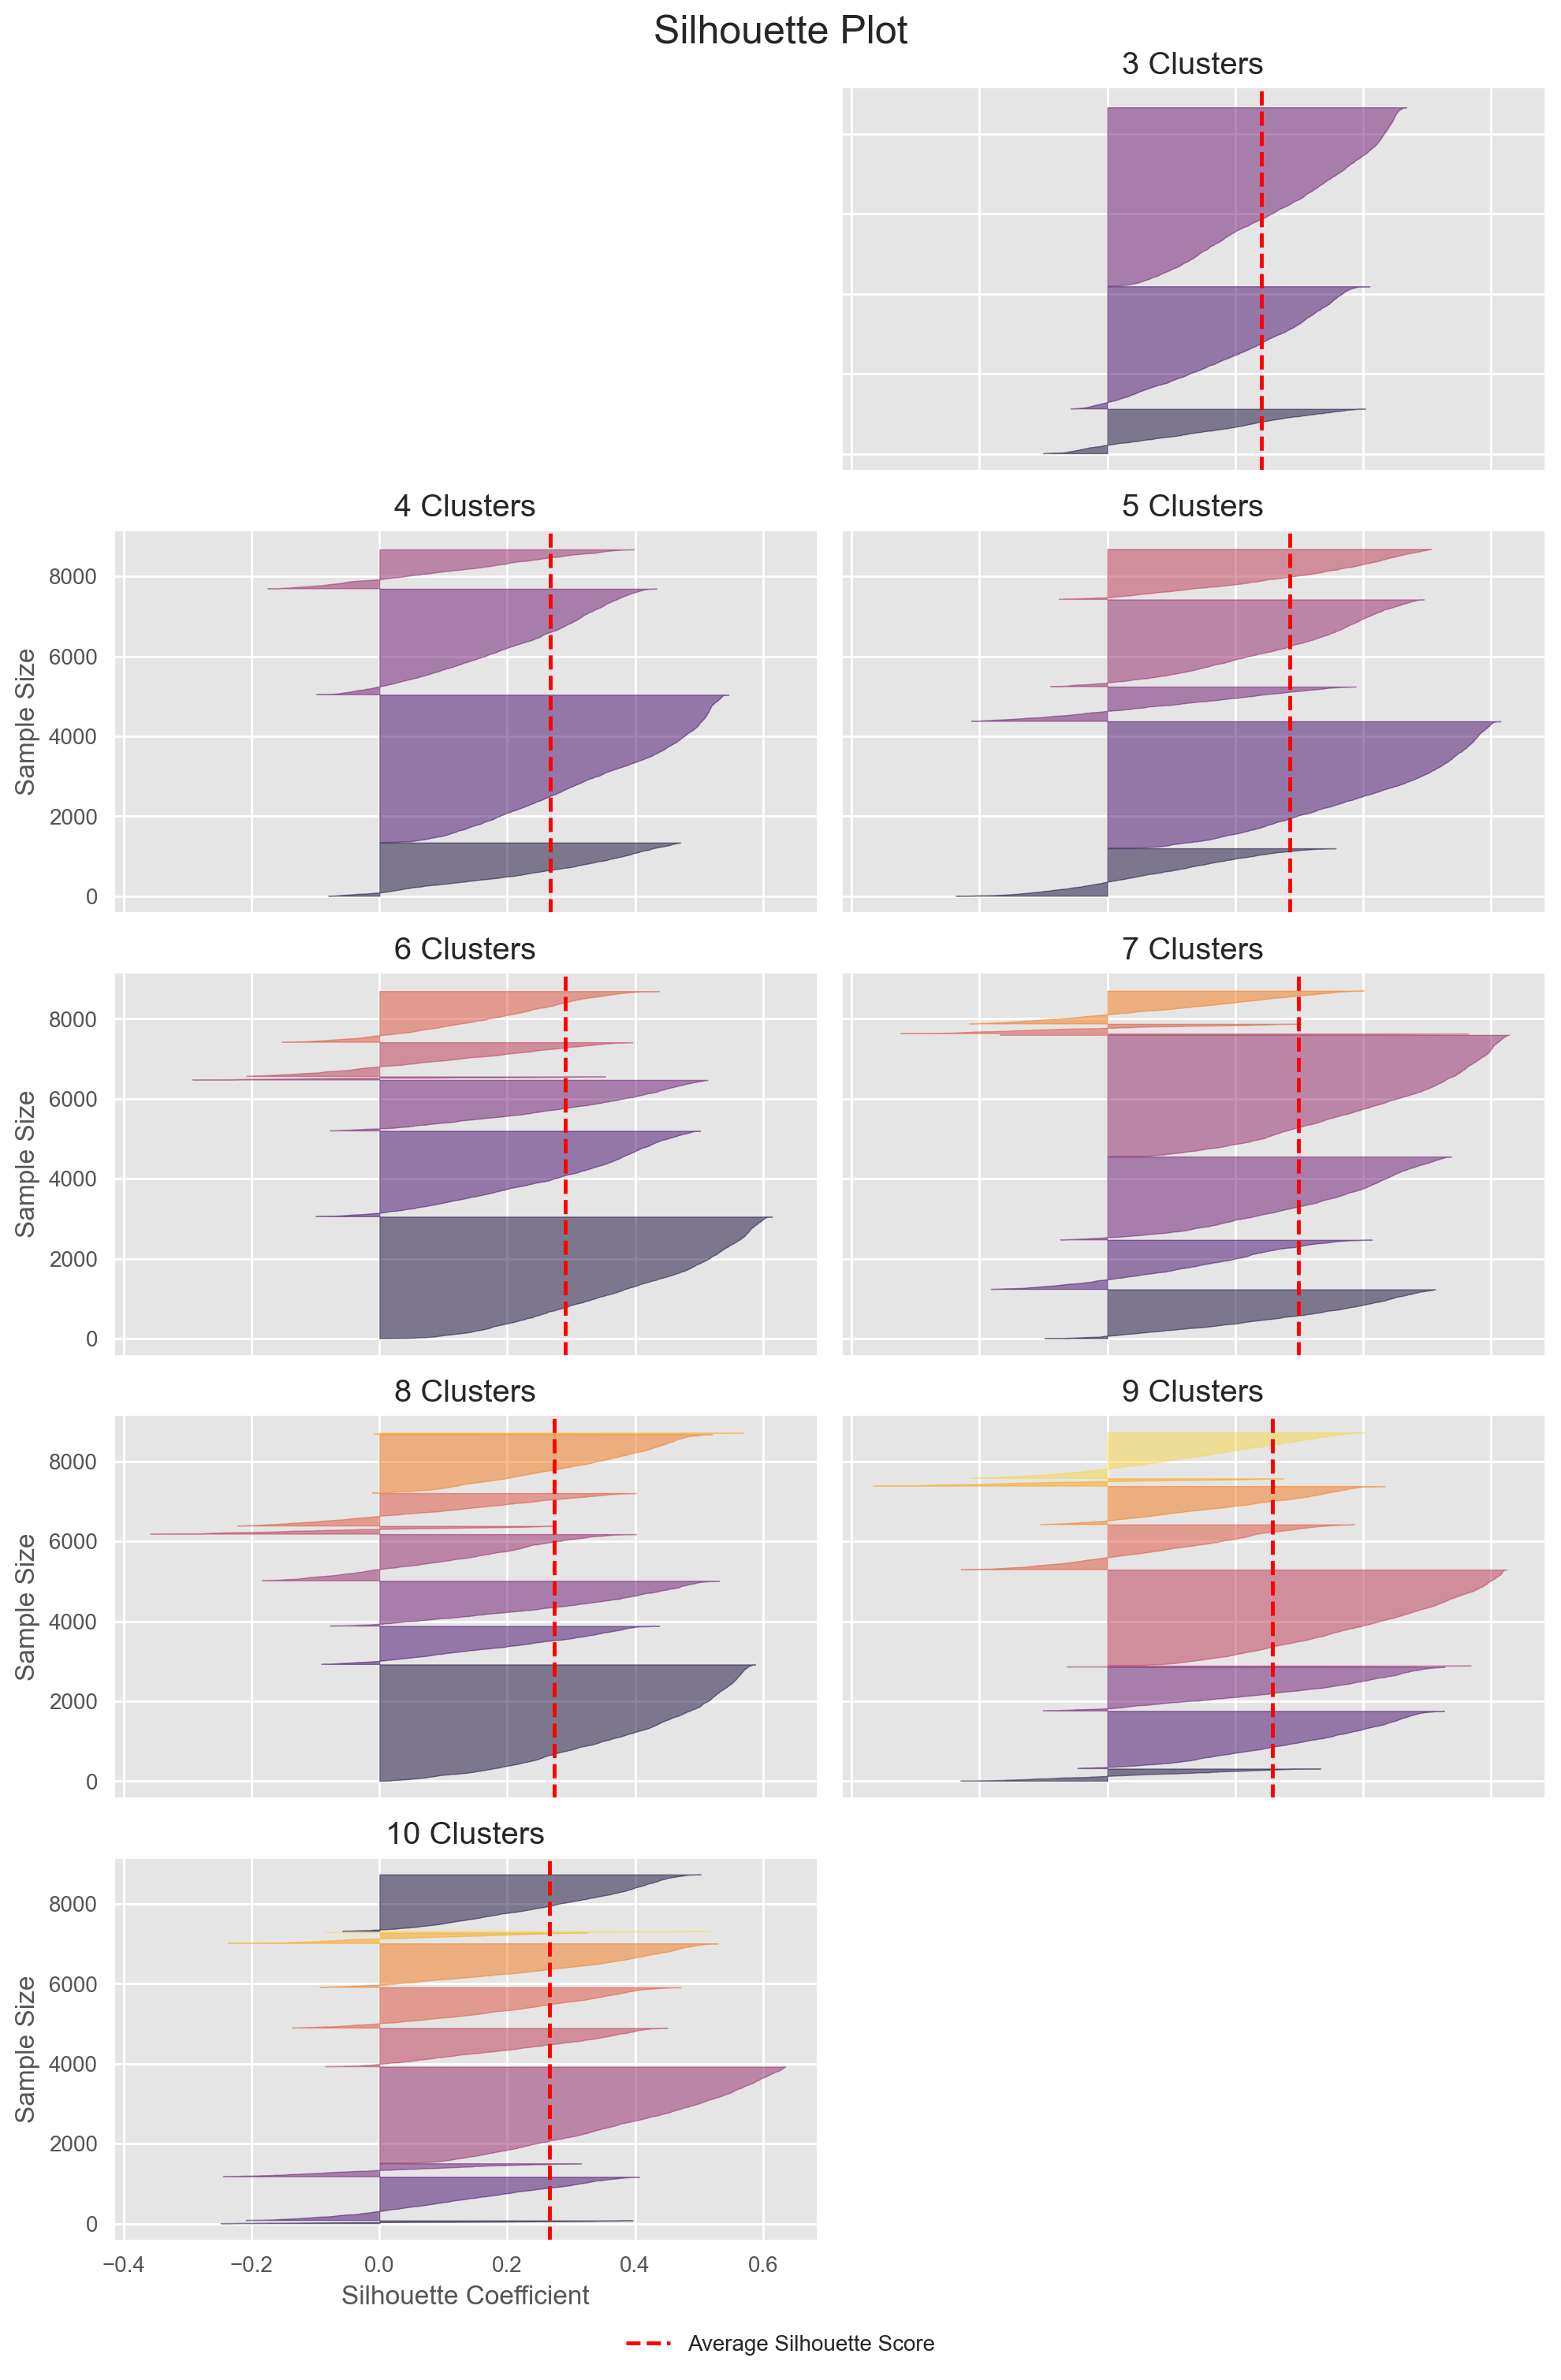

In [27]:
# Set random state and range of clusters
random_state = 42
start = 2
end = 10

# Define the number of rows and columns for subplots
nrow, ncol = 5, 2

# Create subplots
fig, ax = plt.subplots(nrow, ncol, figsize=(10, 15), dpi=200, sharex=True, sharey=True)

# Define the color palette
inferno_palette = sns.color_palette("inferno", n_colors=end - start + 1)

# Iterate over the range of clusters
for k in range(start, end + 1):
    q, mod = divmod(k, 2)

    # Skip empty subplot
    if ((q - 1) == 0) & (mod == 0):
        pass
    else:
        # Create KMeans model and SilhouetteVisualizer
        kmeans_model = KMeans(n_clusters=k, init="k-means++", random_state=random_state, n_init=10)  # Set n_init explicitly
        visualizer = SilhouetteVisualizer(kmeans_model, colors=inferno_palette, ax=ax[q - 1][mod])
        visualizer.fit(df_fa)

        # Set subplot title
        ax[q - 1][mod].set_title(f"{k} Clusters")

        # Set labels
        if mod == 0:
            ax[q - 1][mod].set_ylabel("Sample Size")
        if (q - 1) == (nrow - 1):
            ax[q - 1][mod].set_xlabel("Silhouette Coefficient")

# Remove empty subplots
for axes in ax.flat:
    if not bool(axes.has_data()):
        fig.delaxes(axes)

# Get legend handles and labels
handles, labels = ax[q - 1][mod].get_legend_handles_labels()

# Add legend at the bottom center
fig.legend(handles, labels, loc="center", bbox_to_anchor=(0.5, -0.005))

# Set the overall title
plt.suptitle("Silhouette Plot", fontsize=18)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# **Model Inference**
Model inference refers to the application of a trained model to make predictions or classifications on new, unseen data. Once a model has been evaluated and deemed satisfactory, it can be deployed to make real-world predictions. 
<hr>

In [28]:
kmeans_model = KMeans(n_clusters=7, init="k-means++", random_state=random_state, n_init=10)  # Explicitly set n_init
kmeans_model.fit(df_fa)

KMeans(n_clusters=7, n_init=10, random_state=42)

In the k-means clustering algorithm, cluster centers are selected to minimize the distance between data points. The algorithm starts with initial cluster centers and iteratively updates them until convergence, where the cluster centers stop changing. K-means provides optimal segmentation, reflecting the true data structure.

In [29]:
# Set random state and initialize an empty list for clusters
random_state = 42
clusters = []

# Set the number of clusters, iterations, and components
n_clusters = 7
n_iterations = kmeans_model.n_iter_
n_components = fa_5.n_factors

# Iterate over the range of iterations
for iteration in range(1, n_iterations + 1):
    # Create a temporary KMeans model for each iteration
    temp_model = KMeans(n_clusters=n_clusters, init="k-means++", random_state=random_state, max_iter=iteration, n_init=10)
    
    # Fit the model and append the cluster centers to the list
    temp_model.fit(df_fa)
    clusters.append(temp_model.cluster_centers_)

# Check the actual size of the clusters array
actual_size = np.array(clusters).size

# Determine the correct shape for the DataFrame
rows = actual_size // n_clusters
columns = n_clusters

# Reshape the clusters array based on the correct size
reshaped_clusters = np.array(clusters).reshape(rows, columns)

# Create multi-index for the DataFrame
first_index = sum([[f"Iteration {iteration}" for component in range(n_components)] for iteration in range(1, n_iterations + 1)], [])
second_index = [f"Component {component + 1}" for component in range(n_components)] * n_iterations
multi_index = pd.MultiIndex.from_arrays([first_index, second_index])

# Create the DataFrame with iteration history
iteration_history = pd.DataFrame(
    data=reshaped_clusters,
    columns=[f"Cluster {cluster}" for cluster in range(n_clusters)],
    index=multi_index
)
iteration_history

Cluster 0  Cluster 1  Cluster 2  Cluster 3  \
Iteration 1  Component 1  -0.265150  -0.171637   0.255228   2.746243   
             Component 2  -0.194595   0.015496  -0.046181   0.699596   
             Component 3   0.920570  -0.228136  -0.163389   1.206700   
             Component 4  -0.044460   0.833393   1.141061  -2.106617   
             Component 5   0.151003   0.155652  -0.149717  -0.438968   
...                             ...        ...        ...        ...   
Iteration 37 Component 1  -0.083638  -0.391159  -0.519023  -0.278889   
             Component 2   0.252939  -0.512846   0.919166  -0.501424   
             Component 3   0.008818  -0.233754  -0.141314  -0.753467   
             Component 4   0.060157  -0.294003   0.860399  -2.803904   
             Component 5   3.368168  -0.320052  -0.021913   2.316326   

                          Cluster 4  Cluster 5  Cluster 6  
Iteration 1  Component 1  -0.372636   0.122292   2.485550  
             Component 2  -0.563555  -0.381062  -0.325695  
             Component 3  -0.054012   0.282551   7.827630  
             Component 4  -0.263067   0.016953  -0.833462  
             Component 5  -0.104043  -0.371046  -1.541347  
...                             ...        ...        ...  
Iteration 37 Component 1  -1.720608   1.250813  -0.457259  
             Component 2  -0.249096   1.196861  -0.142431  
             Component 3   0.212179   0.323483  10.681778  
             Component 4   0.325852   0.355349   1.133088  
             Component 5  -0.157054  -0.217823   0.142241  

[185 rows x 7 columns]

In [30]:
final_cluster_centers = pd.DataFrame(
    data=kmeans_model.cluster_centers_,
    columns=df_fa.columns,
    index=[f"Cluster {cluster}" for cluster in range(kmeans_model.n_clusters)]
).T
final_cluster_centers

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6
Component 1,-0.083638,1.250813,-0.501424,-0.233754,10.681778,0.325852,-0.021913
Component 2,-0.391159,-0.457259,-0.249096,-0.141314,0.060157,0.355349,2.316326
Component 3,-0.519023,0.252939,1.196861,-0.753467,-0.294003,1.133088,-0.157054
Component 4,-0.278889,-0.512846,-0.142431,0.212179,0.860399,3.368168,-0.217823
Component 5,-1.720608,0.919166,0.008818,0.323483,-2.803904,-0.320052,0.142241


In [31]:
df_labeled = df_fa.copy()
df_labeled["Cluster"] = kmeans_model.labels_
df_labeled["Distance"] = np.min(kmeans_model.transform(df_fa),axis=1)
df_labeled.head()

,Component 1,Component 2,Component 3,Component 4,Component 5,Cluster,Distance
0,-0.468001,-0.806452,-0.800246,0.046945,-0.202331,3,0.896243
1,-0.019107,1.169520,-0.788684,0.573086,-0.802249,3,1.778518
2,0.809211,-0.786300,-0.606089,-0.284058,1.874243,1,1.416235
3,-0.348487,-0.765665,-0.981168,0.129313,0.405370,3,0.684396
4,-0.595084,-0.556173,0.640184,1.021097,0.057387,2,1.330081


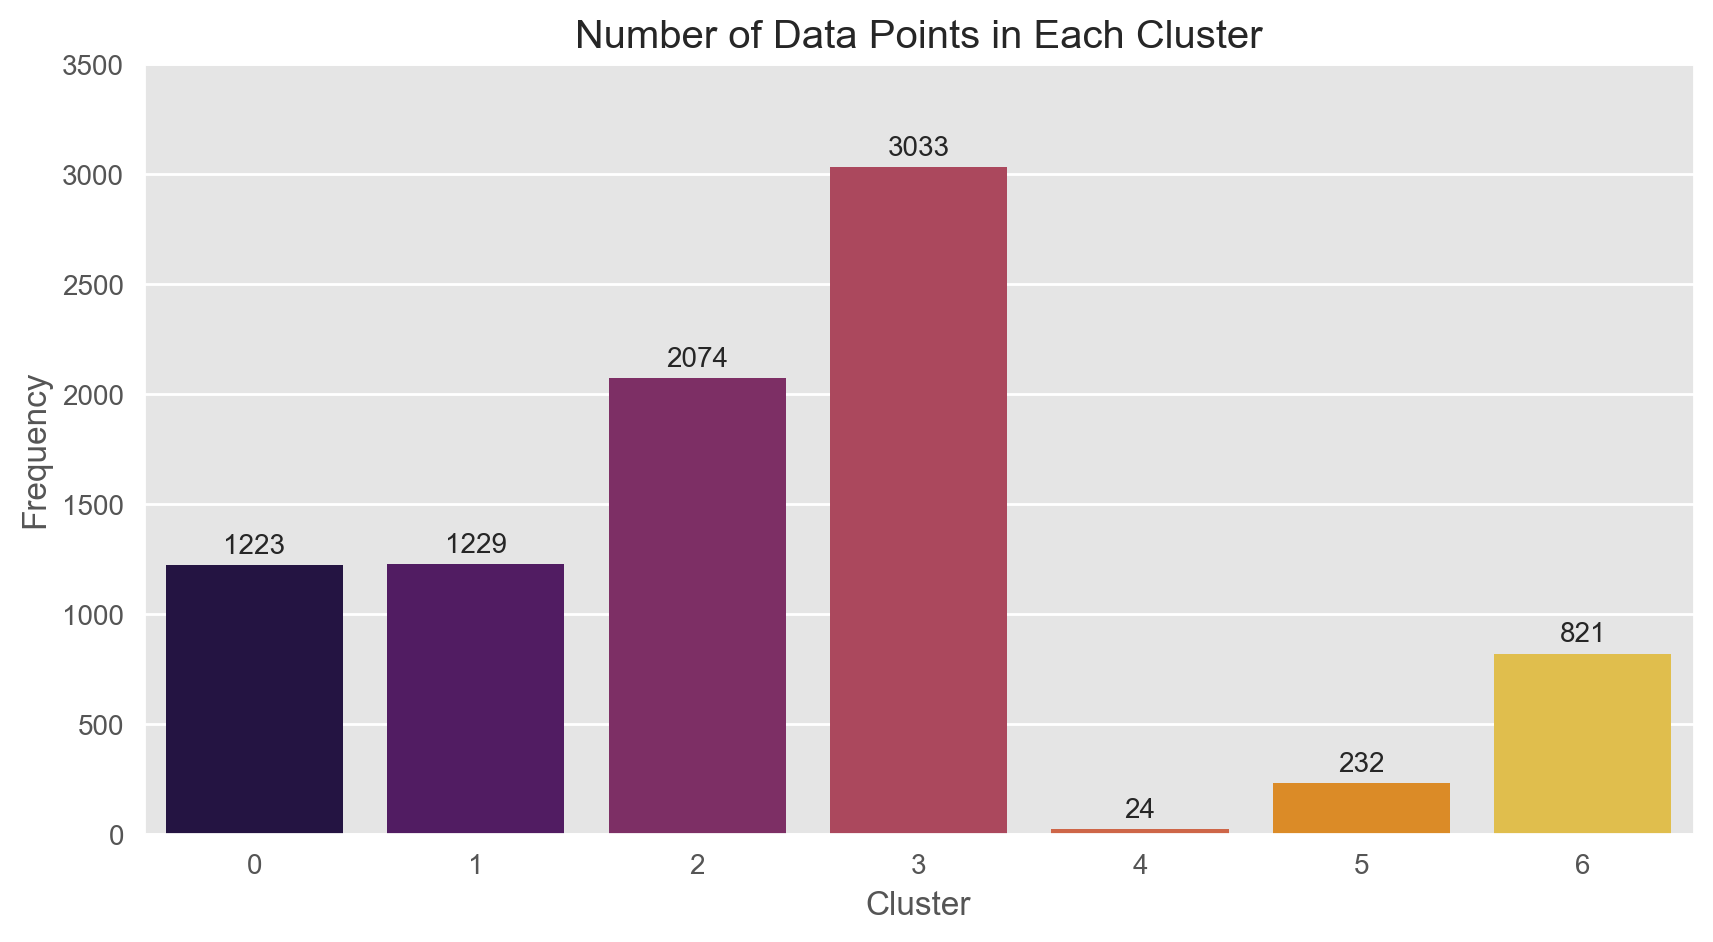

In [32]:
# Create a subplot with the specified size and DPI
fig, ax = plt.subplots(figsize=(10, 5), dpi=200)

# Set Inferno colormap as the base color palette
base_palette = sns.color_palette("inferno", n_colors=len(df_labeled["Cluster"].unique()))

# Use Seaborn countplot with the specified color palette
sns.countplot(data=df_labeled, x="Cluster", hue="Cluster", palette=base_palette, legend=False)

# Set the title, limit the y-axis, and label the y-axis
ax.set_title("Number of Data Points in Each Cluster")
ax.set_ylim(ymax=3500)
ax.set_ylabel("Frequency")

# Add labels to each bar in the plot
for bars in ax.containers:
    ax.bar_label(bars, fmt="%.0f", padding=2, fontweight=500)

# Display the plot
plt.show()

# **Model Evaluation**
<hr>
In an ANOVA table for k-means clustering, the F-value and p-value are utilized to assess the statistical significance of the differences between cluster means. The F-value represents the ratio of mean squares between groups (i.e., clusters) to mean squares within groups, while the p-value indicates the probability that the observed differences in cluster means are due to chance. A significantly large F-value for clusters, accompanied by a small p-value (typically less than 0.05), suggests a statistically significant difference between cluster means. This implies that the clusters are distinct and hold statistical significance.

In essence, the k-means ANOVA results provide insights into whether the observed differences in cluster means are more than what would be expected by chance alone or if they are statistically significant. This information helps gauge the success of k-means in forming meaningful and relevant clusters based on the given data.

In [33]:
stats,p_values = [],[]
for feature in df_fa.columns:
    groups = [df_fa[feature][kmeans_model.labels_ == label] for label in range(kmeans_model.n_clusters)]
    stat,p_value = f_oneway(*groups)
    stats.append(stat)
    p_values.append(p_value)

anova = pd.DataFrame(
    data=[stats,p_values],
    columns=[f"Component {component + 1}" for component in range(fa_5.n_factors)],
    index=["F","P-Value"]
).T
anova

,F,P-Value
Component 1,2378.660069,0.0
Component 2,2042.480729,0.0
Component 3,2425.100148,0.0
Component 4,883.174984,0.0
Component 5,2182.425628,0.0


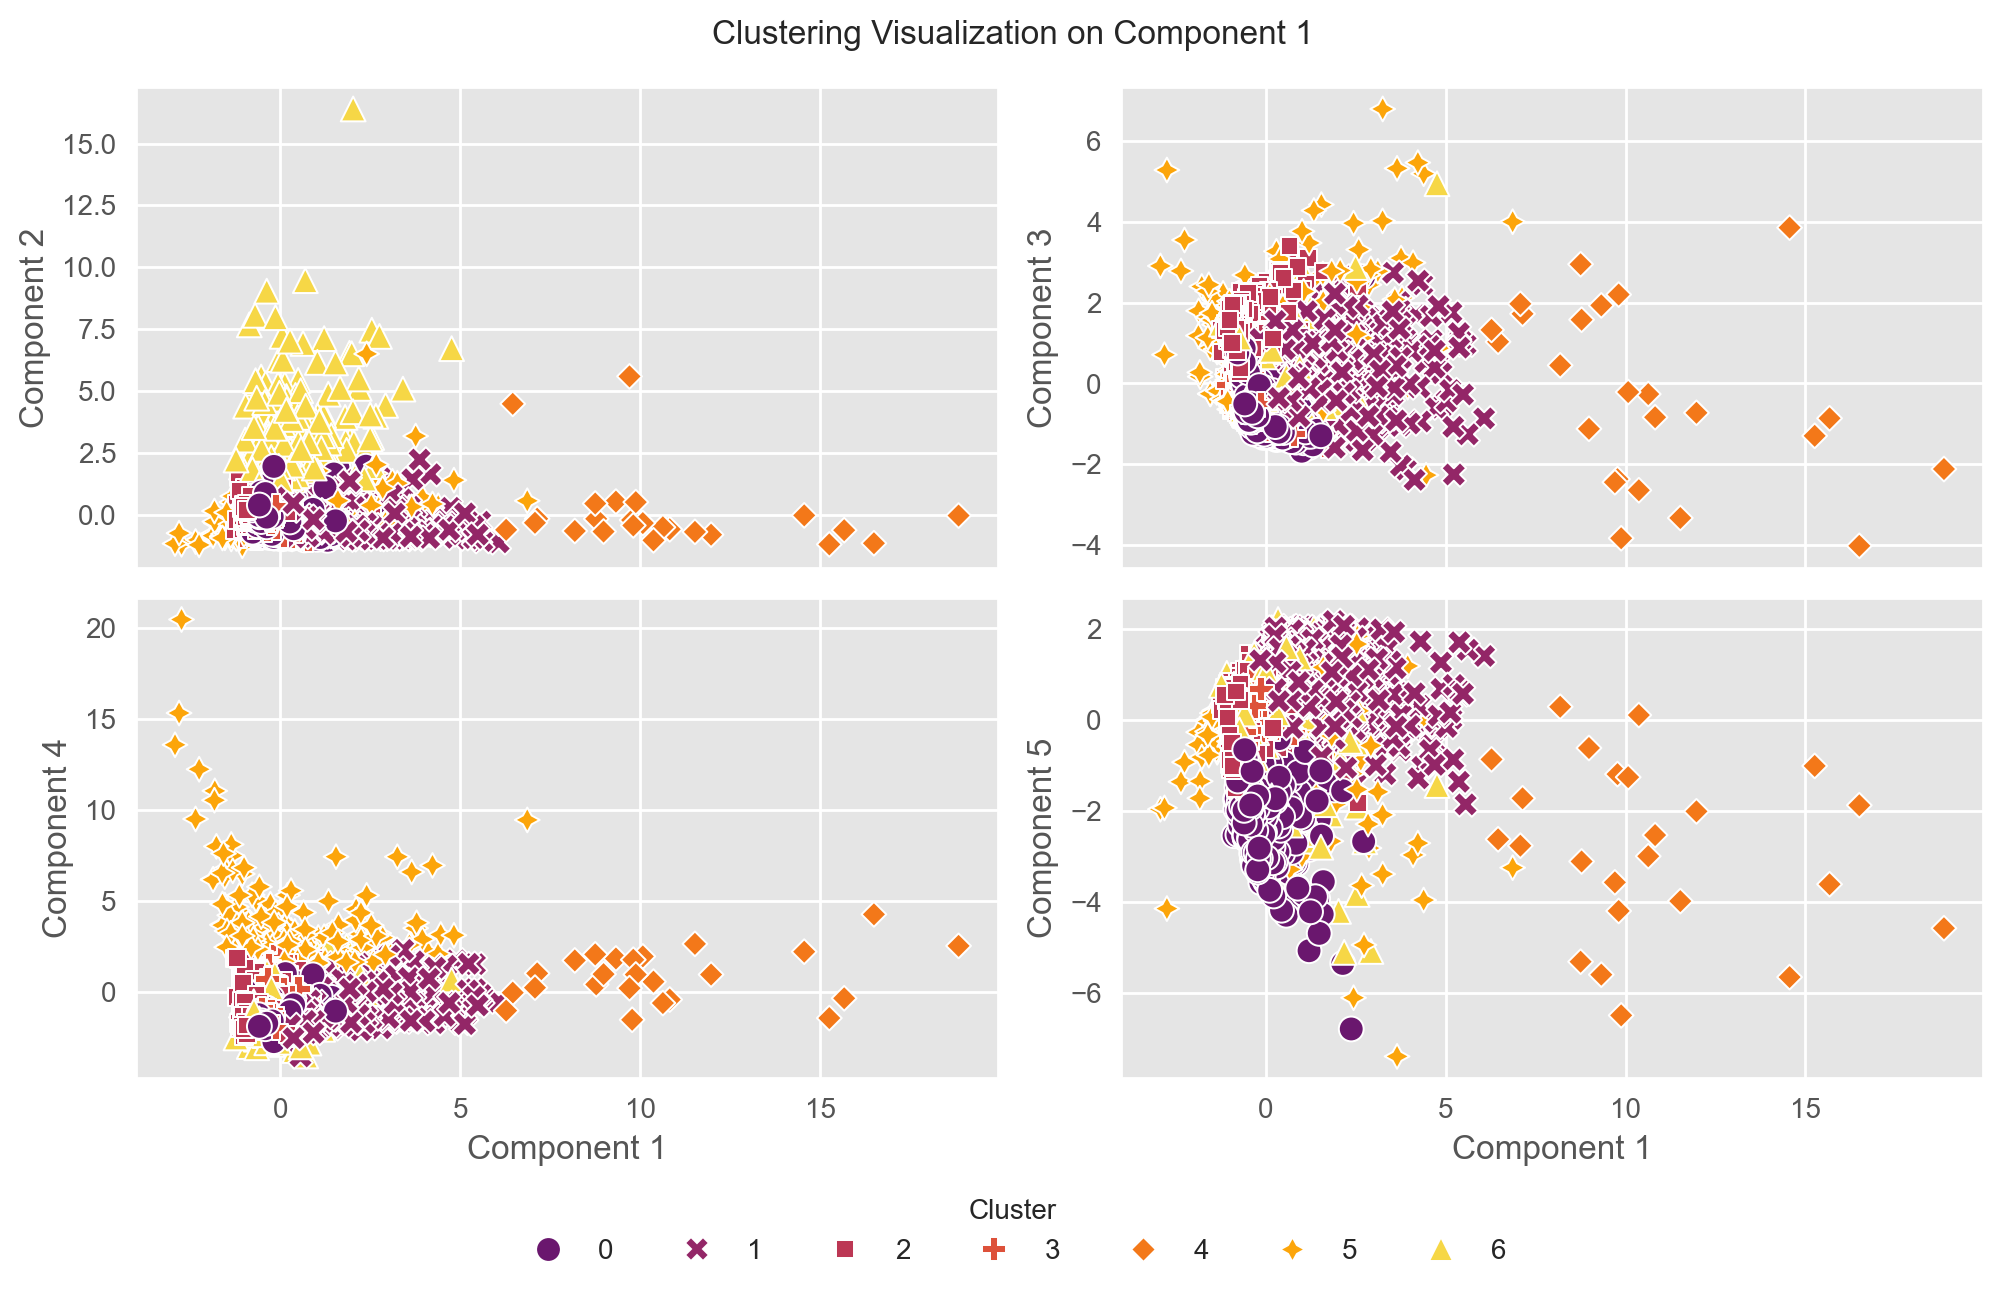

In [34]:
fig,ax = plt.subplots(2,2,figsize=(10,6),dpi=200,sharex=True)

for feature,length in zip(df_fa.columns[1:],range(len(df_fa.columns[1:]))):
    q,mod = divmod(length,2)
    sns.scatterplot(
        data=df_labeled,
        x="Component 1",
        y=feature,
        ax=ax[q][mod],
        hue="Cluster",
        style="Cluster",
        s=80,
        palette=sns.color_palette("inferno",n_colors=9)[2:],
    )
    ax[q][mod].get_legend().remove()

handles,labels = ax[q][mod].get_legend_handles_labels()
fig.legend(handles,labels,bbox_to_anchor=(0.5,-0.03),loc="center",ncol=kmeans_model.n_clusters,title="Cluster")

plt.suptitle("Clustering Visualization on Component 1")
plt.tight_layout()
plt.show()

# **Conclusion**
<hr>

After conducting factor analysis and k-means clustering on a credit card customer dataset, we were able to identify 7 distinct clusters of credit card users based on their spending patterns and payment habits. `These project indicate that credit card customers can be effectively segmented based on their spending and payment behaviors, and these clusters may prove valuable for targeted marketing and risk assessment efforts`. Further analysis may be required to fully comprehend the characteristics and needs of each cluster, but the results of this study establish a solid foundation for additional research in this field.